Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_zomato=pd.read_csv("C:\\Users\\HP\\Desktop\\zomato.csv")
df_zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df_country_code=pd.read_excel('Country-Code.xlsx')
df_country_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
df=pd.merge(df_zomato,df_country_code)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In this dataset I've to Predict the Average Cost for two and Price range both. Since 'Average Cost for two' is in the form of continuous number hence will use Regression model and 'Price range' is in the form of categorical String format so will use classification model as well. Ergo, first will build a regression model to predict the 'Average Cost for two' and later in this notebook itself will build a classification model to predict 'Price range' as well.

#### Regression Model Building
Exploratory Data Analysis(EDA)

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [6]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [7]:
df.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
593,208965,The Coffee Club,214,Dubai,"Wasl Vita, Opposite Civil Defence Station, Nea...",Jumeirah 1,"Jumeirah 1, Dubai",55.256397,25.211103,Cafe,...,No,Yes,No,No,3,4.5,Dark Green,Excellent,403,UAE


In [8]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 9551
Columns are 22
Shape is (9551, 22)


In [9]:
df.ndim

2

In [10]:
df.size

210122

In [11]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9541, 9542, 9543, 9544, 9545, 9546, 9547, 9548, 9549, 9550],
           dtype='int64', length=9551)

In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [13]:
df_numeric=df.select_dtypes(exclude='object')
df_numeric

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,6317637,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,162,121.014101,14.553708,1200,3,4.5,591
2,6300002,162,121.056831,14.581404,4000,4,4.4,270
3,6318506,162,121.056475,14.585318,1500,4,4.9,365
4,6314302,162,121.057508,14.584450,1500,4,4.8,229
...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,80,3,4.1,788
9547,5908749,208,29.041297,41.009847,105,3,4.2,1034
9548,5915807,208,29.034640,41.055817,170,4,3.7,661
9549,5916112,208,29.036019,41.057979,120,4,4.0,901


In [14]:
#showing the dataframe containing only categorical columns
df_categorical=df.select_dtypes(include='object')
df_categorical

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good,Phillipines
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",Botswana Pula(P),No,No,No,No,Dark Green,Excellent,Phillipines
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",Turkish,Turkish Lira(TL),No,No,No,No,Green,Very Good,Turkey
9547,Ceviz AÛôacÛ±,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul","World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,Green,Very Good,Turkey
9548,Huqqa,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul","Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,Yellow,Good,Turkey
9549,Aôôk Kahve,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",Restaurant Cafe,Turkish Lira(TL),No,No,No,No,Green,Very Good,Turkey


In [15]:
from sklearn.compose import make_column_selector as selector

In [16]:
numeric_columns=selector(dtype_exclude=object)(df)
print(numeric_columns)
print('\n Total numeric columns are ',len(numeric_columns))

['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

 Total numeric columns are  8


In [17]:
categorical_columns=selector(dtype_include=object)(df)
print(categorical_columns)
print('\n Total string categorical columns are ',len(categorical_columns))

['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']

 Total string categorical columns are  14


In [18]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [20]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [21]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

#### Data Visualization
Countplot

The Value Counts for the attribute "Country Code" is
 1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

The Countplot Diagram for the attribute "Country Code" is
 AxesSubplot(0.125,0.125;0.775x0.755)


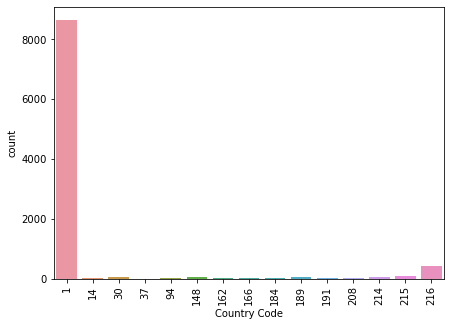



The Value Counts for the attribute "Currency" is
 Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(Œ£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

The Countplot Diagram for the attribute "Currency" is
 AxesSubplot(0.125,0.125;0.775x0.755)


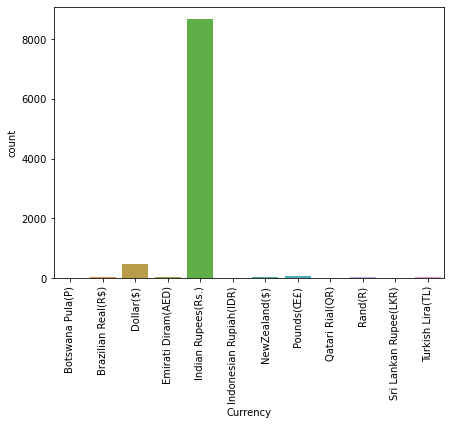



The Value Counts for the attribute "Has Table booking" is
 No     8393
Yes    1158
Name: Has Table booking, dtype: int64

The Countplot Diagram for the attribute "Has Table booking" is
 AxesSubplot(0.125,0.125;0.775x0.755)


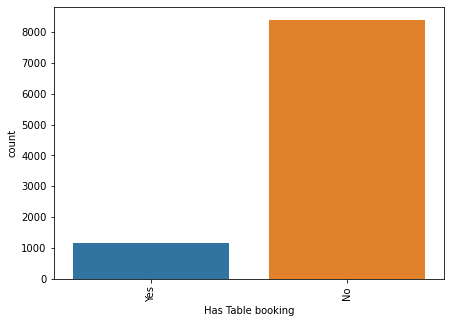



The Value Counts for the attribute "Has Online delivery" is
 No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

The Countplot Diagram for the attribute "Has Online delivery" is
 AxesSubplot(0.125,0.125;0.775x0.755)


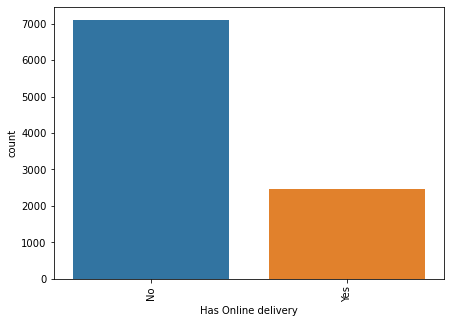



The Value Counts for the attribute "Is delivering now" is
 No     9517
Yes      34
Name: Is delivering now, dtype: int64

The Countplot Diagram for the attribute "Is delivering now" is
 AxesSubplot(0.125,0.125;0.775x0.755)


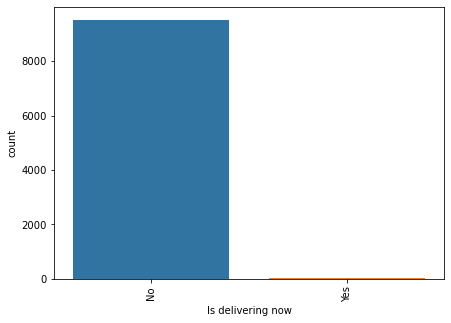



The Value Counts for the attribute "Switch to order menu" is
 No    9551
Name: Switch to order menu, dtype: int64

The Countplot Diagram for the attribute "Switch to order menu" is
 AxesSubplot(0.125,0.125;0.775x0.755)


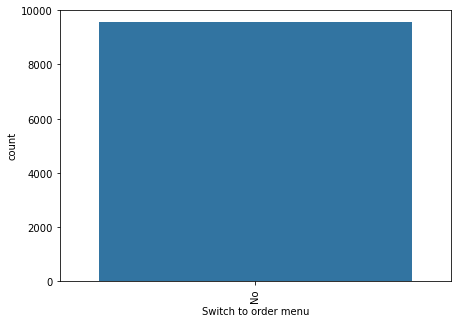



The Value Counts for the attribute "Price range" is
 1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

The Countplot Diagram for the attribute "Price range" is
 AxesSubplot(0.125,0.125;0.775x0.755)


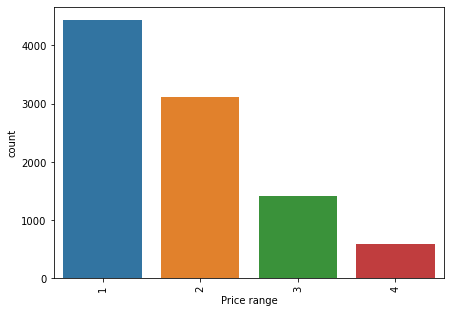



The Value Counts for the attribute "Aggregate rating" is
 0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

The Countplot Diagram for the attribute "Aggregate rating" is
 AxesSubplot(0.125,0.125;0.775x0.755)


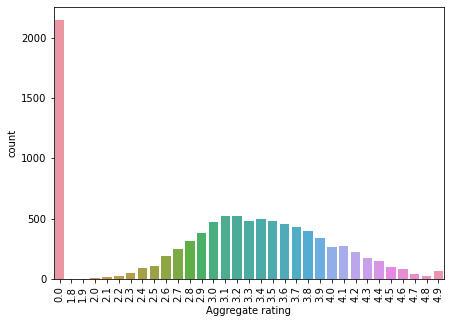



The Value Counts for the attribute "Rating color" is
 Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

The Countplot Diagram for the attribute "Rating color" is
 AxesSubplot(0.125,0.125;0.775x0.755)


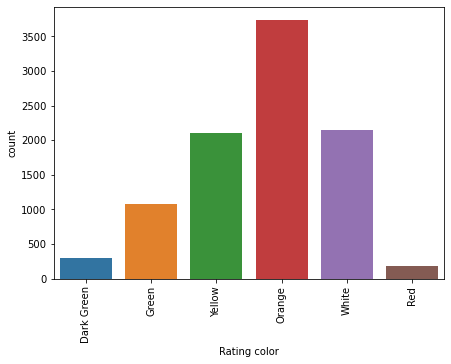



The Value Counts for the attribute "Rating text" is
 Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

The Countplot Diagram for the attribute "Rating text" is
 AxesSubplot(0.125,0.125;0.775x0.755)


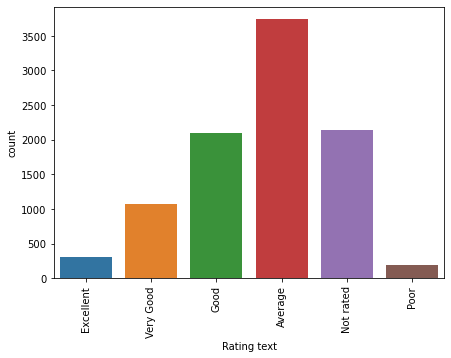



The Value Counts for the attribute "Country" is
 India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

The Countplot Diagram for the attribute "Country" is
 AxesSubplot(0.125,0.125;0.775x0.755)


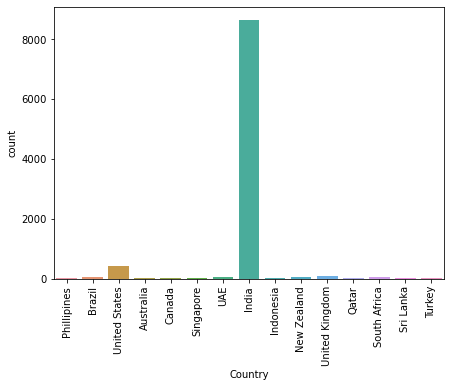

In [22]:
for i in df.columns.drop(['Restaurant ID','Restaurant Name','City','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines','Average Cost for two','Votes']):
    print(f'The Value Counts for the attribute "{i}" is\n {df[i].value_counts()}')
    plt.figure(figsize=(7,5))
    print(f'\nThe Countplot Diagram for the attribute "{i}" is\n {sns.countplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Histogram Plot


The Histogram Diagram for the attribute "Country Code" is
 AxesSubplot(0.125,0.125;0.775x0.755)


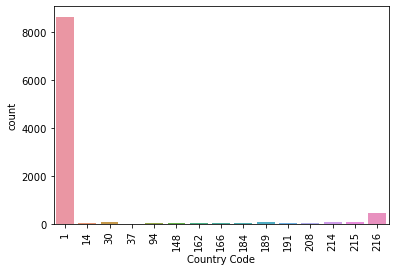




The Histogram Diagram for the attribute "Currency" is
 AxesSubplot(0.125,0.125;0.775x0.755)


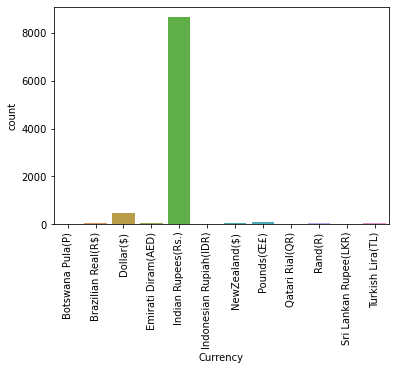




The Histogram Diagram for the attribute "Has Table booking" is
 AxesSubplot(0.125,0.125;0.775x0.755)


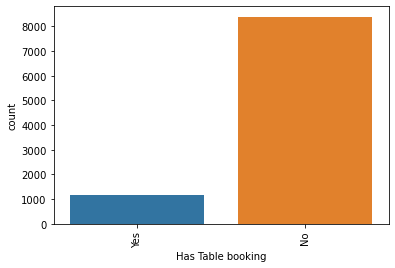




The Histogram Diagram for the attribute "Has Online delivery" is
 AxesSubplot(0.125,0.125;0.775x0.755)


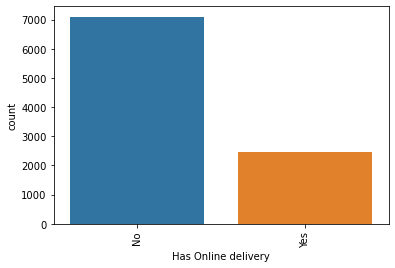




The Histogram Diagram for the attribute "Is delivering now" is
 AxesSubplot(0.125,0.125;0.775x0.755)


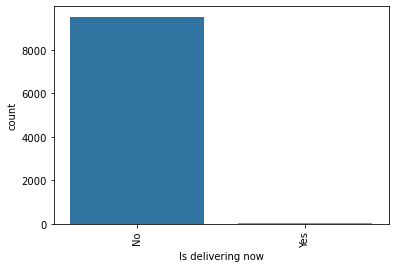




The Histogram Diagram for the attribute "Switch to order menu" is
 AxesSubplot(0.125,0.125;0.775x0.755)


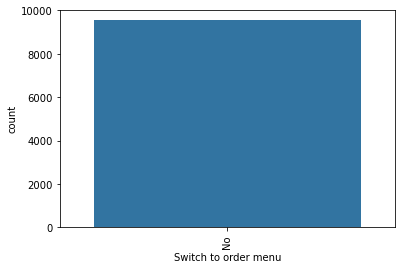




The Histogram Diagram for the attribute "Price range" is
 AxesSubplot(0.125,0.125;0.775x0.755)


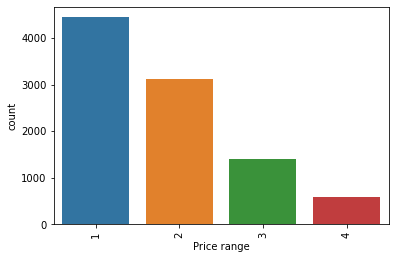




The Histogram Diagram for the attribute "Aggregate rating" is
 AxesSubplot(0.125,0.125;0.775x0.755)


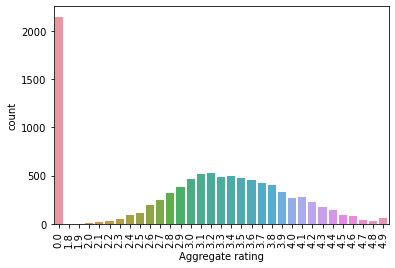




The Histogram Diagram for the attribute "Rating color" is
 AxesSubplot(0.125,0.125;0.775x0.755)


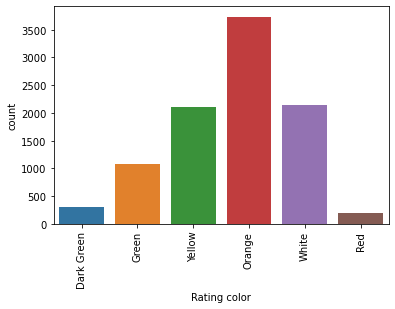




The Histogram Diagram for the attribute "Rating text" is
 AxesSubplot(0.125,0.125;0.775x0.755)


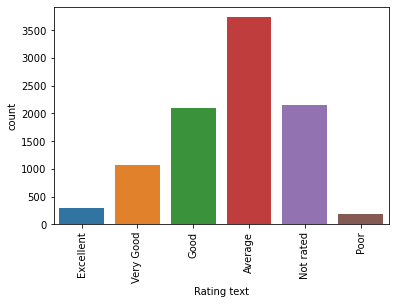




The Histogram Diagram for the attribute "Country" is
 AxesSubplot(0.125,0.125;0.775x0.755)


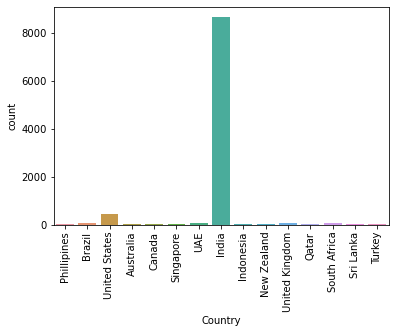

In [23]:
for i in df.columns.drop(['Restaurant ID','Restaurant Name','City','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines','Average Cost for two','Votes']):
    print(f'\nThe Histogram Diagram for the attribute "{i}" is\n {sns.countplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Scatterplot (x-axis=Average Cost for two")

The Scatter Plot for the attribute "Average Cost for two" & "Country Code" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


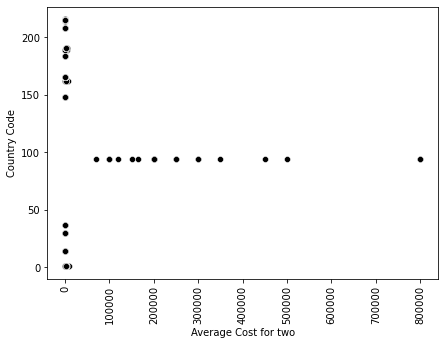



The Scatter Plot for the attribute "Average Cost for two" & "Currency" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


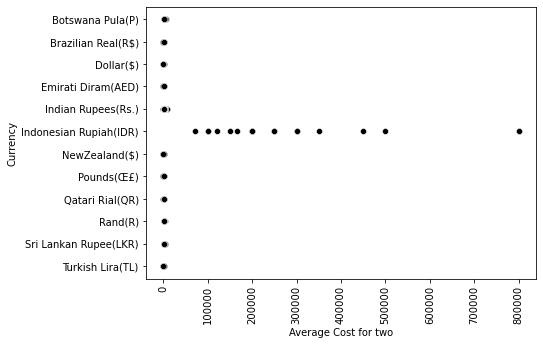



The Scatter Plot for the attribute "Average Cost for two" & "Has Table booking" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


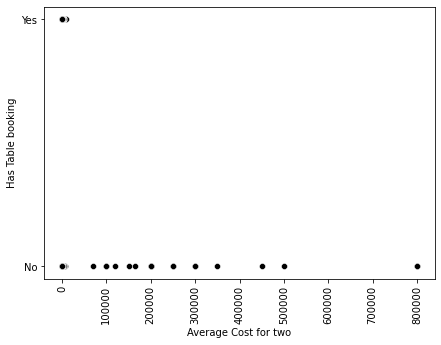



The Scatter Plot for the attribute "Average Cost for two" & "Has Online delivery" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


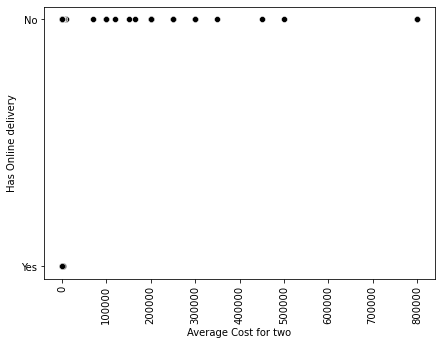



The Scatter Plot for the attribute "Average Cost for two" & "Is delivering now" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


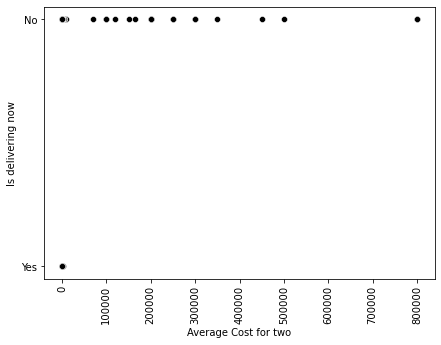



The Scatter Plot for the attribute "Average Cost for two" & "Switch to order menu" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


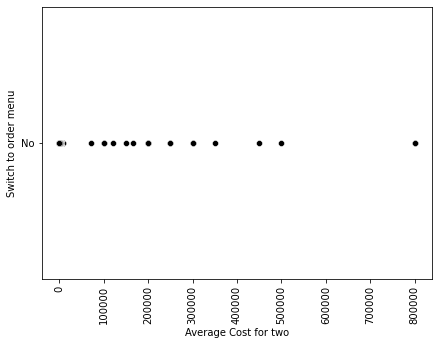



The Scatter Plot for the attribute "Average Cost for two" & "Price range" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


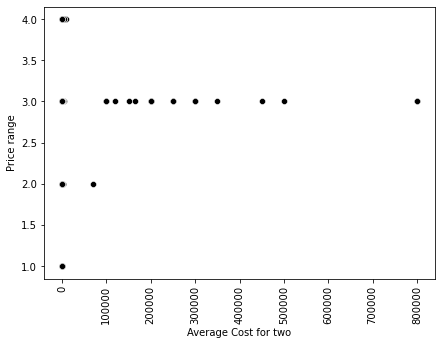



The Scatter Plot for the attribute "Average Cost for two" & "Aggregate rating" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


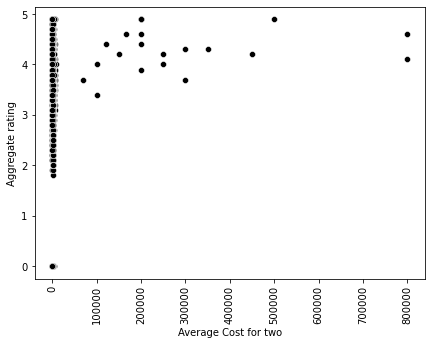



The Scatter Plot for the attribute "Average Cost for two" & "Rating color" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


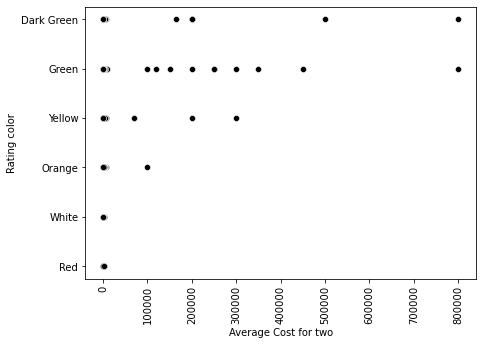



The Scatter Plot for the attribute "Average Cost for two" & "Rating text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


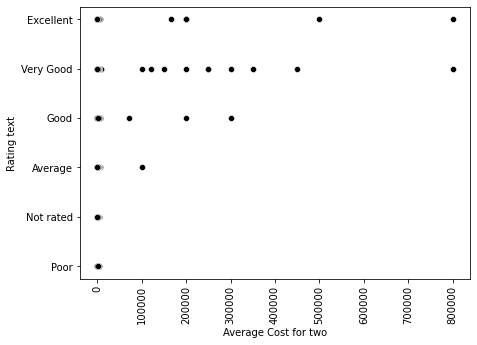



The Scatter Plot for the attribute "Average Cost for two" & "Country" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


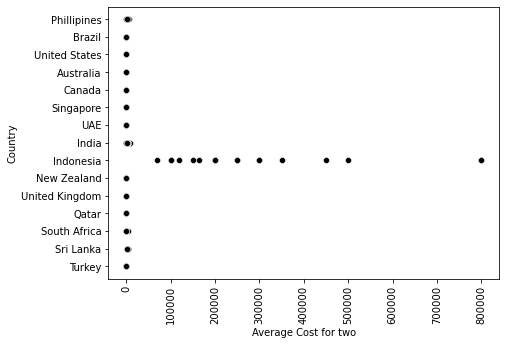

In [24]:
for i in df.columns.drop(['Restaurant ID','Restaurant Name','City','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines','Average Cost for two','Votes']):
    plt.figure(figsize=(7,5))
    print(f'The Scatter Plot for the attribute "Average Cost for two" & "{i}" is-\n {sns.scatterplot(df["Average Cost for two"],df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Line PLot

The Lineplot for the attribute "Average Cost for two" & "Country Code" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


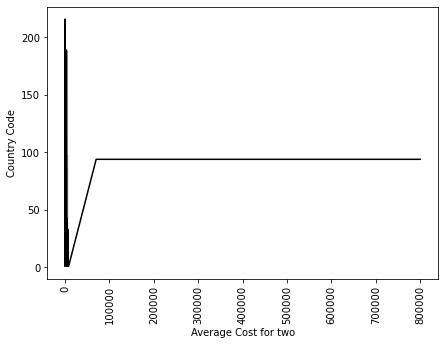



The Lineplot for the attribute "Average Cost for two" & "Currency" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


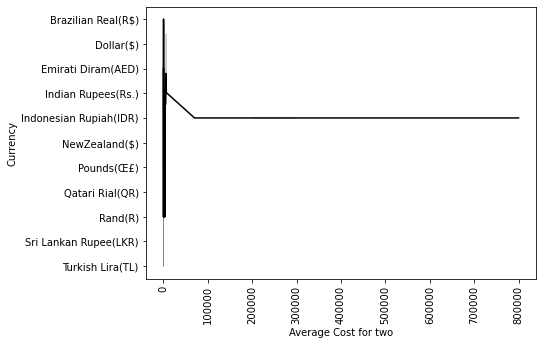



The Lineplot for the attribute "Average Cost for two" & "Has Table booking" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


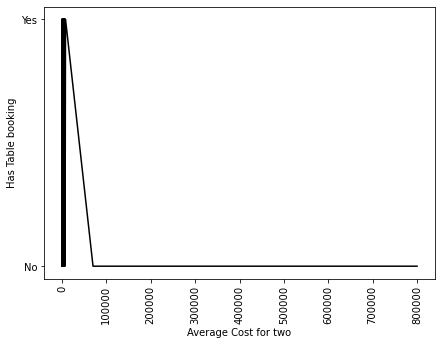



The Lineplot for the attribute "Average Cost for two" & "Has Online delivery" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


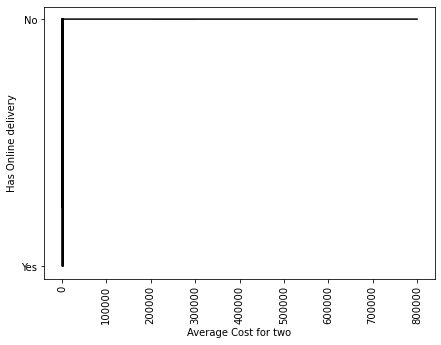



The Lineplot for the attribute "Average Cost for two" & "Is delivering now" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


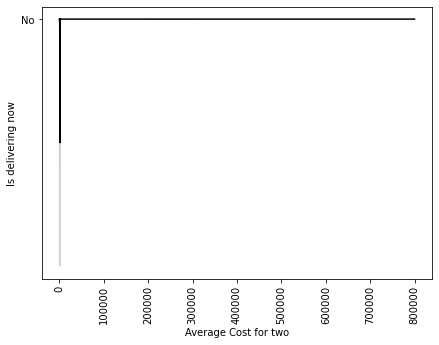



The Lineplot for the attribute "Average Cost for two" & "Switch to order menu" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


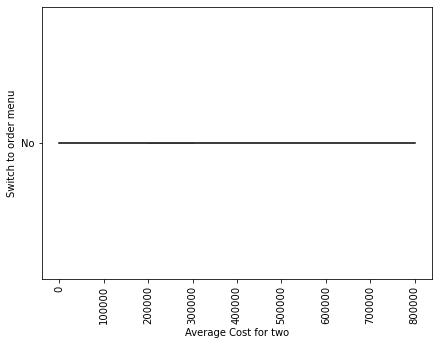



The Lineplot for the attribute "Average Cost for two" & "Price range" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


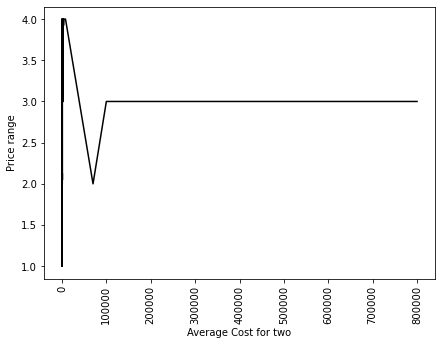



The Lineplot for the attribute "Average Cost for two" & "Aggregate rating" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


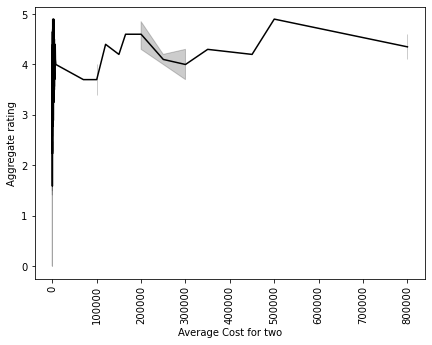



The Lineplot for the attribute "Average Cost for two" & "Rating color" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


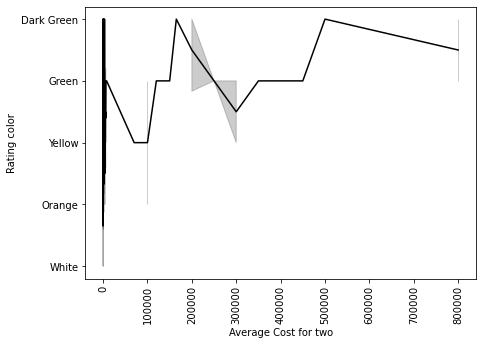



The Lineplot for the attribute "Average Cost for two" & "Rating text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


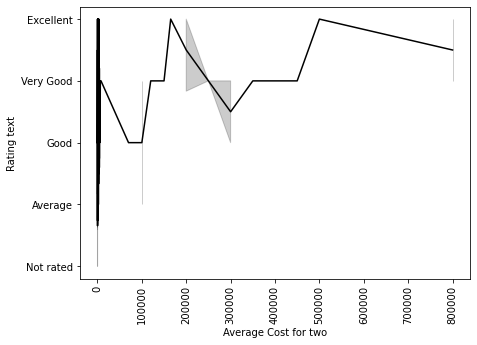



The Lineplot for the attribute "Average Cost for two" & "Country" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


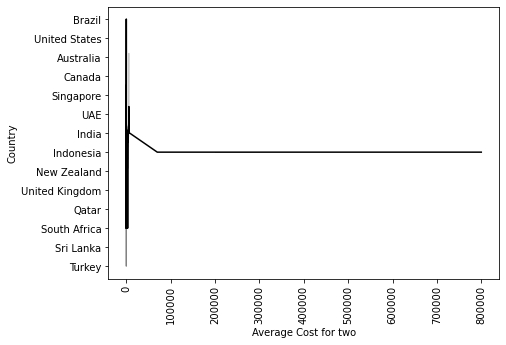

In [25]:
for i in df.columns.drop(['Restaurant ID','Restaurant Name','City','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines','Average Cost for two','Votes']):
    plt.figure(figsize=(7,5))
    print(f'The Lineplot for the attribute "Average Cost for two" & "{i}" is-\n {sns.lineplot(df["Average Cost for two"],df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Categorical Plot

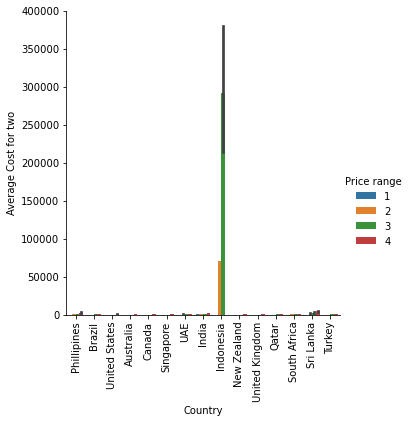

In [26]:
sns.catplot(x='Country',y='Average Cost for two',hue='Price range',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

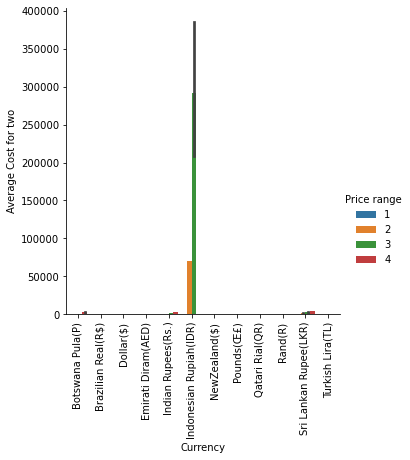

In [27]:
sns.catplot(x='Currency',y='Average Cost for two',hue='Price range',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

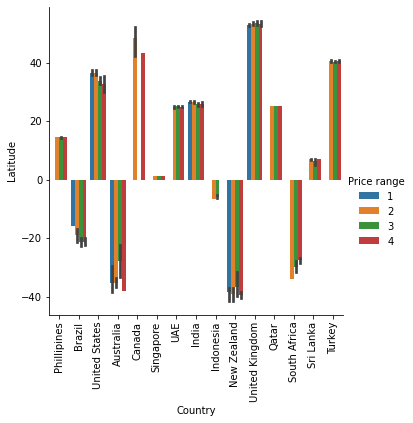

In [28]:
sns.catplot(x='Country',y='Latitude',hue='Price range',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

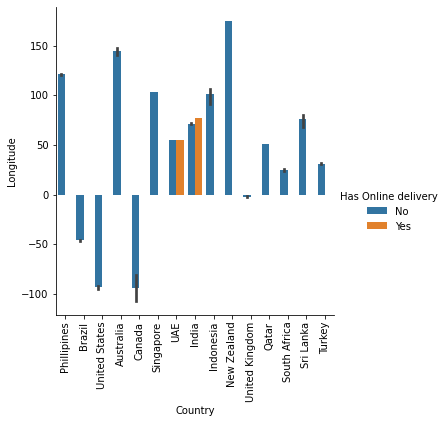

In [29]:
sns.catplot(x='Country',y='Longitude',hue='Has Online delivery',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

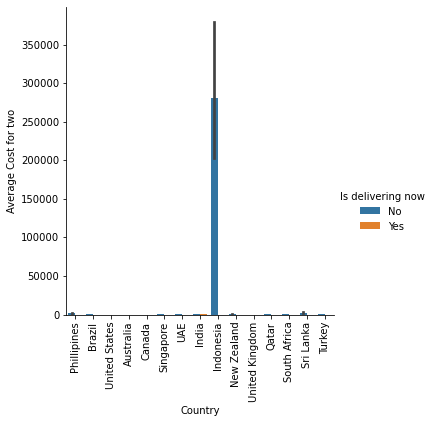

In [30]:
sns.catplot(x='Country',y='Average Cost for two',hue='Is delivering now',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

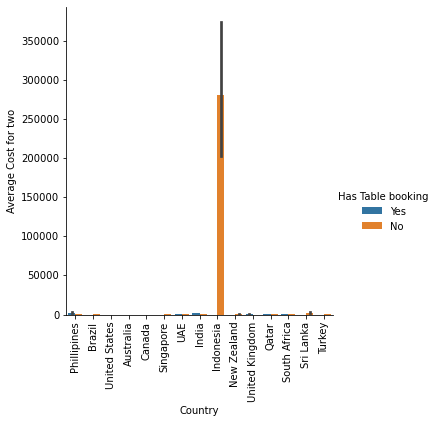

In [31]:
sns.catplot(x='Country',y='Average Cost for two',hue='Has Table booking',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

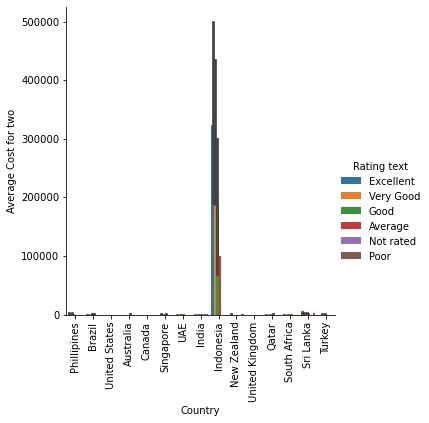

In [32]:
sns.catplot(x='Country',y='Average Cost for two',hue='Rating text',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

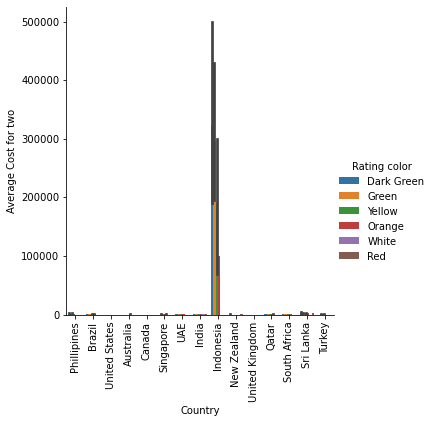

In [33]:
sns.catplot(x='Country',y='Average Cost for two',hue='Rating color',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

###### Encoding 

Label Encoder

In [34]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [35]:
for j in categorical_columns:
    df[j]=LabelEncoder().fit_transform(df[j].astype(str))

In [36]:
#will drop this column as it's containing only 1 value that can create null values in our model
df.drop(['Switch to order menu'],axis=1,inplace=True)

In [37]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,...,0,1,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,0,1,0,0,4,4.8,0,1,229,6


In [38]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,...,11,0,0,0,3,4.1,1,5,788,11
9547,5908749,1311,208,140,5962,552,558,29.041297,41.009847,1824,...,11,0,0,0,3,4.2,1,5,1034,11
9548,5915807,3069,208,140,5966,554,561,29.034640,41.055817,1110,...,11,0,0,0,4,3.7,5,2,661,11
9549,5916112,513,208,140,5967,554,561,29.036019,41.057979,1657,...,11,0,0,0,4,4.0,1,5,901,11
9550,5927402,7240,208,140,4258,670,681,29.026016,40.984776,331,...,11,0,0,0,2,4.0,1,5,591,11


###### Violin plot

The Violin-Plot for the attribute "Restaurant ID" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


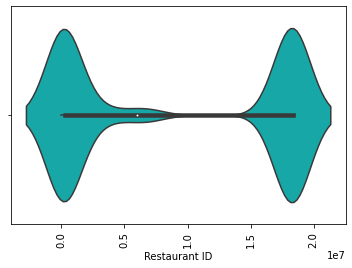



The Violin-Plot for the attribute "Restaurant Name" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


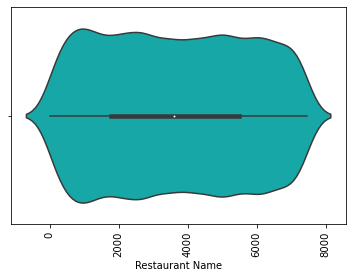



The Violin-Plot for the attribute "Country Code" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


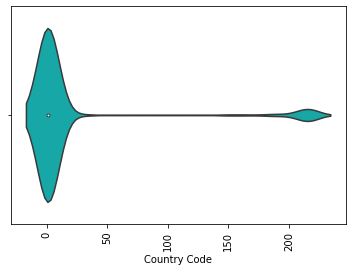



The Violin-Plot for the attribute "City" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


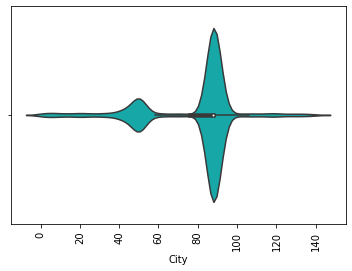



The Violin-Plot for the attribute "Address" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


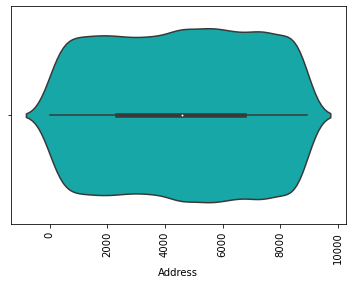



The Violin-Plot for the attribute "Locality" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


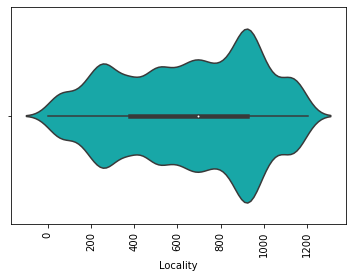



The Violin-Plot for the attribute "Locality Verbose" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


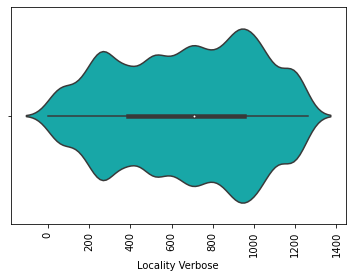



The Violin-Plot for the attribute "Longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


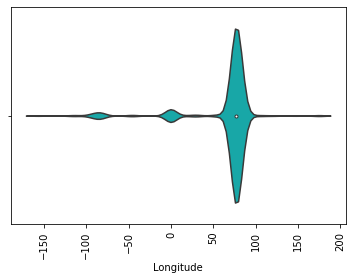



The Violin-Plot for the attribute "Latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


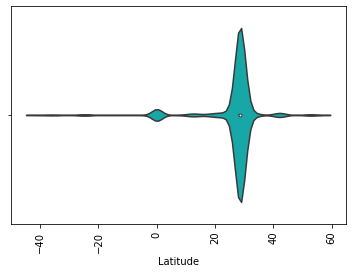



The Violin-Plot for the attribute "Cuisines" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


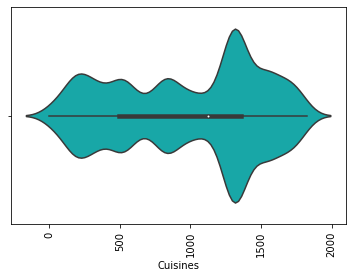



The Violin-Plot for the attribute "Average Cost for two" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


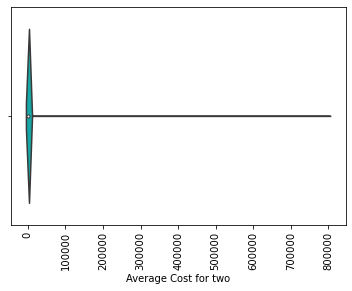



The Violin-Plot for the attribute "Currency" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


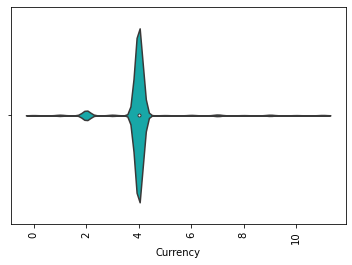



The Violin-Plot for the attribute "Has Table booking" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


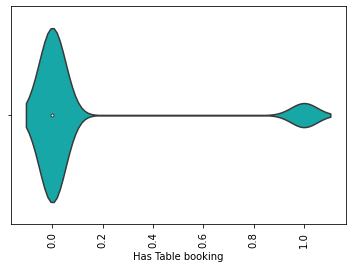



The Violin-Plot for the attribute "Has Online delivery" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


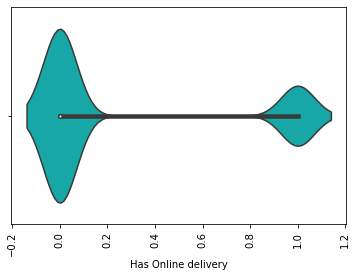



The Violin-Plot for the attribute "Is delivering now" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


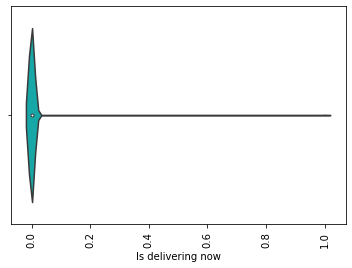



The Violin-Plot for the attribute "Price range" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


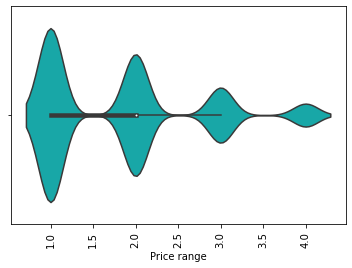



The Violin-Plot for the attribute "Aggregate rating" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


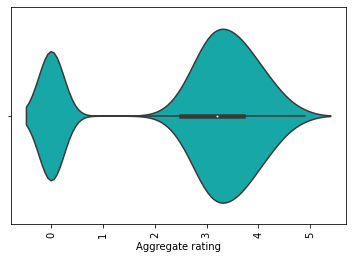



The Violin-Plot for the attribute "Rating color" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


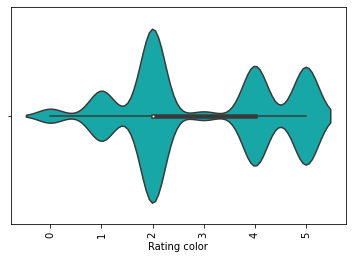



The Violin-Plot for the attribute "Rating text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


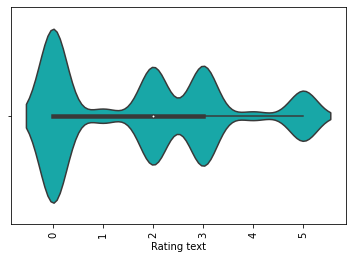



The Violin-Plot for the attribute "Votes" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


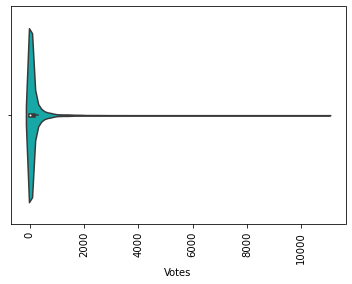



The Violin-Plot for the attribute "Country" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


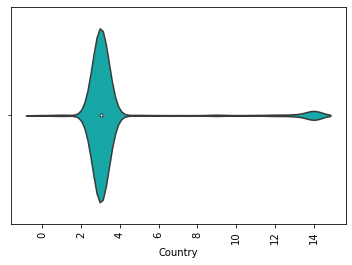

In [39]:
for i in df.columns:
    print(f'The Violin-Plot for the attribute "{i}" is-\n {sns.violinplot(df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Descriptive Statistics

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Restaurant Name,9551.0,3.653205e+03,2.142918e+03,0.000000,1777.500000,3.595000e+03,5.485500e+03,7.445000e+03
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
City,9551.0,7.830143e+01,2.319891e+01,0.000000,76.000000,8.800000e+01,8.800000e+01,1.400000e+02
Address,9551.0,4.542439e+03,2.565717e+03,0.000000,2323.500000,4.610000e+03,6.746500e+03,8.917000e+03
Locality,9551.0,6.581285e+02,3.158665e+02,0.000000,381.000000,6.960000e+02,9.210000e+02,1.207000e+03
Locality Verbose,9551.0,6.773050e+02,3.317274e+02,0.000000,387.000000,7.070000e+02,9.530000e+02,1.264000e+03
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Cuisines,9551.0,9.899508e+02,5.147235e+02,0.000000,497.000000,1.127000e+03,1.355000e+03,1.825000e+03


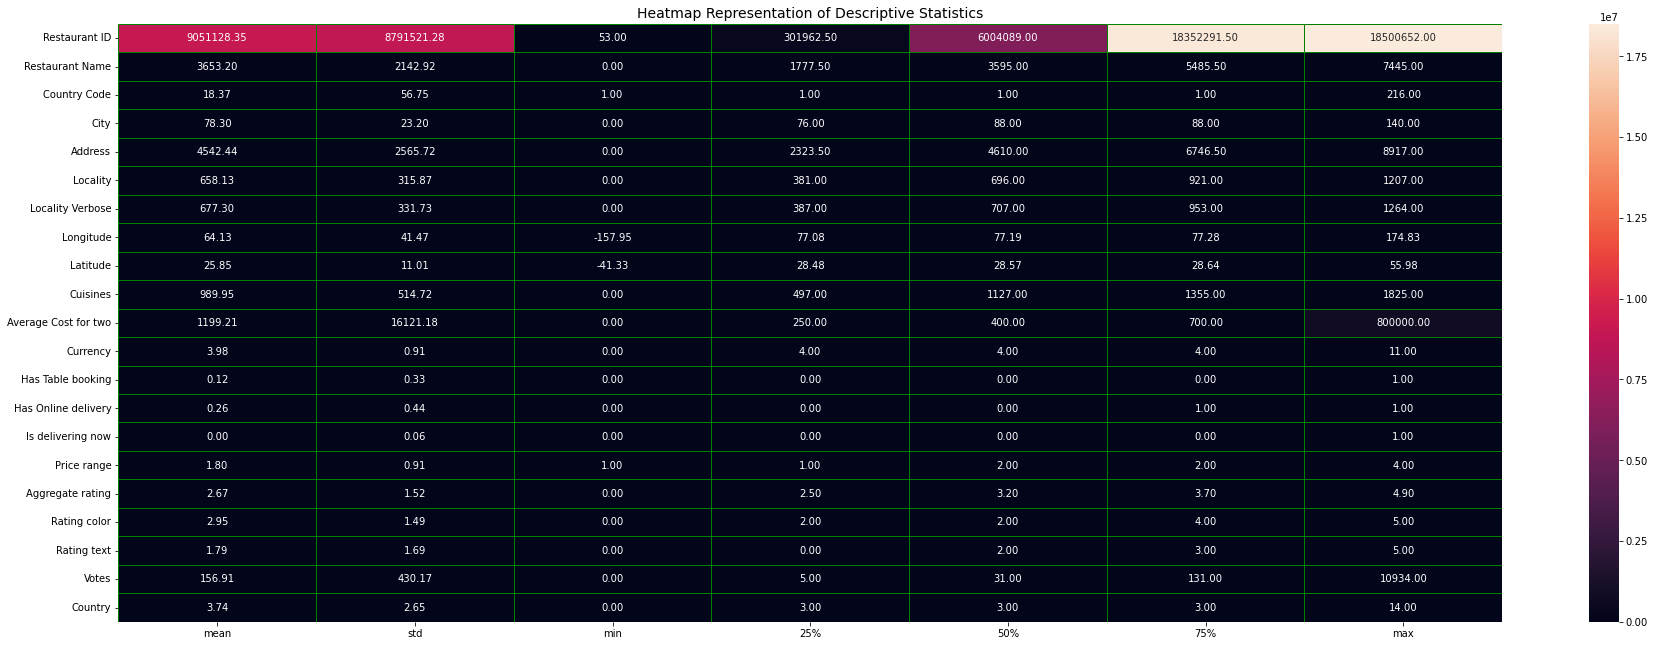

In [41]:
plt.figure(figsize=(31,11))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor='Green',linewidth='0.5',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()


Correlation

In [42]:
df.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Locality Verbose       -0.011852
Country                -0.004034
Is delivering now      -0.001862
Restaurant ID          -0.001693
Cuisines                0.005755
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

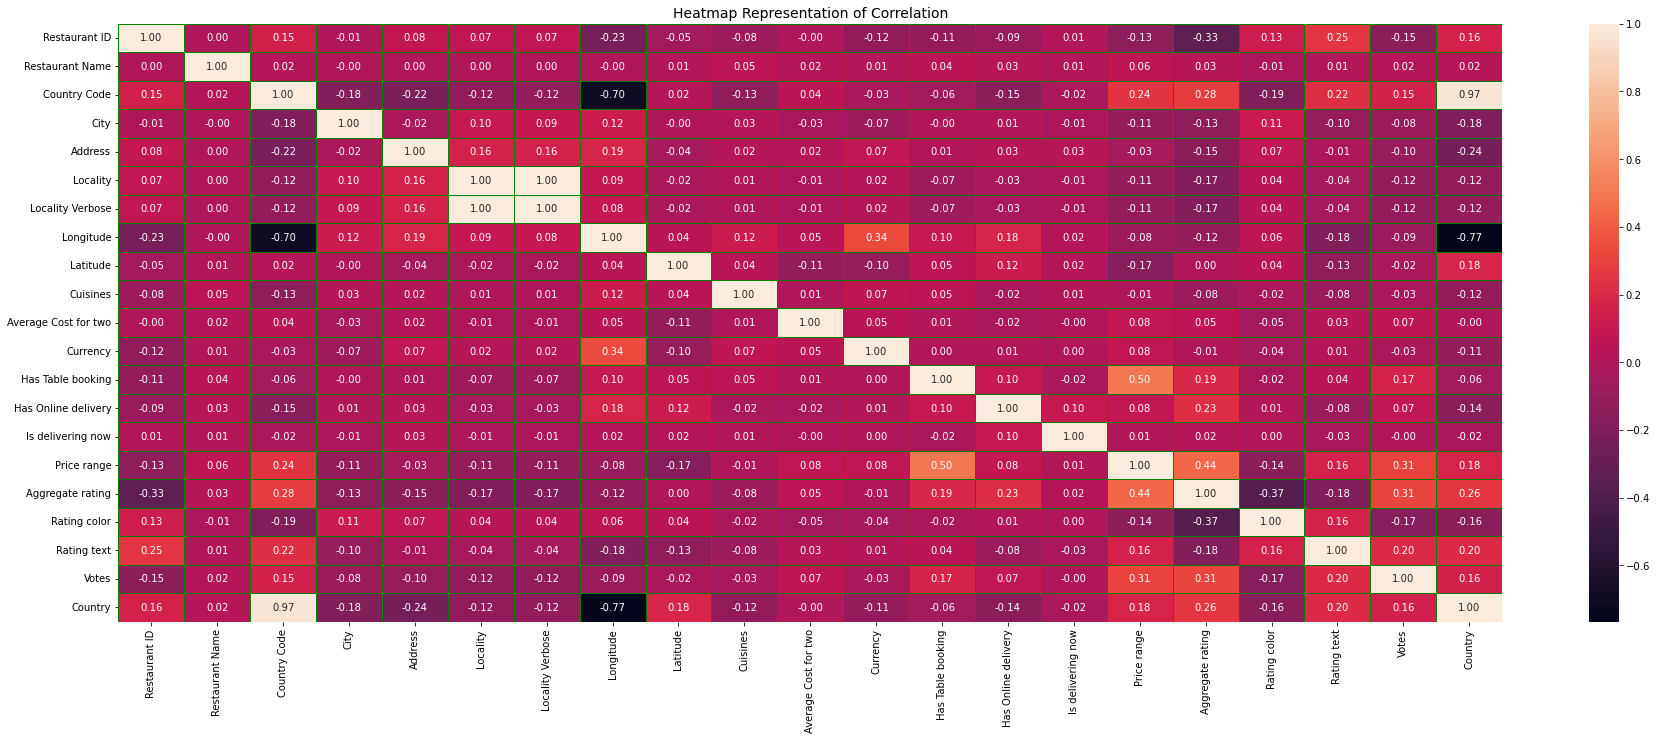

In [43]:
plt.figure(figsize=(31,11))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

Multicollinearity

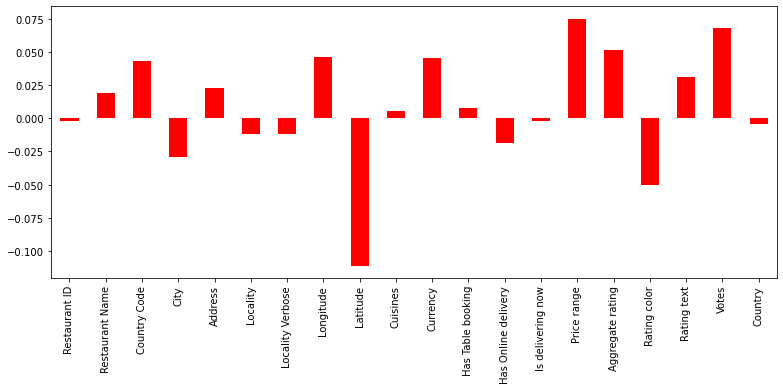

In [44]:
plt.figure(figsize=(13,5))
df.corr()['Average Cost for two'].drop(['Average Cost for two']).plot(kind='bar',color='r')
plt.show()

Skewness

In [45]:
df.skew().sort_values()

Latitude                -3.081635
Longitude               -2.807328
City                    -1.193777
Aggregate rating        -0.954130
Cuisines                -0.305484
Locality                -0.253554
Locality Verbose        -0.183064
Address                 -0.040407
Restaurant Name          0.044637
Rating color             0.046009
Restaurant ID            0.061570
Rating text              0.431408
Price range              0.889618
Has Online delivery      1.114620
Has Table booking        2.321100
Currency                 2.858093
Country Code             3.043965
Country                  3.312721
Votes                    8.807637
Is delivering now       16.673412
Average Cost for two    35.477915
dtype: float64

Distribution Plot

The Distribution Plot for attribute "Restaurant ID" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


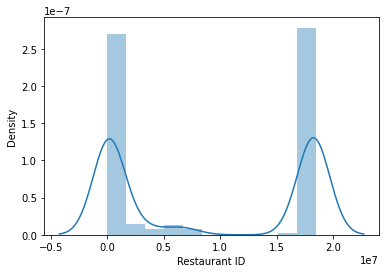



The Distribution Plot for attribute "Restaurant Name" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


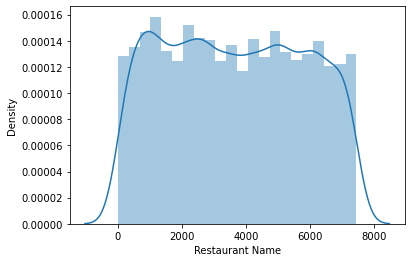



The Distribution Plot for attribute "Country Code" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


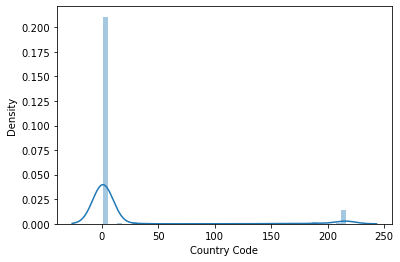



The Distribution Plot for attribute "City" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


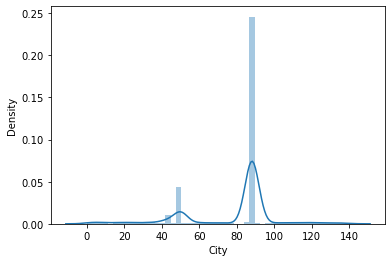



The Distribution Plot for attribute "Address" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


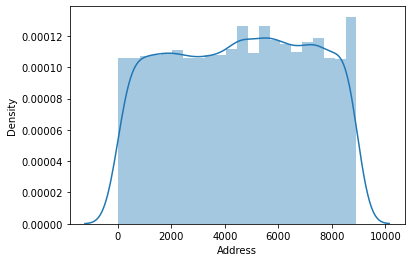



The Distribution Plot for attribute "Locality" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


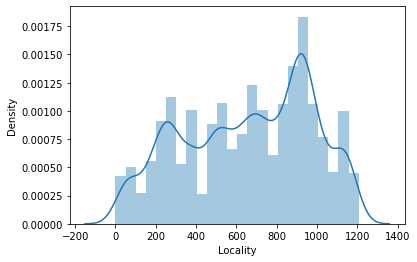



The Distribution Plot for attribute "Locality Verbose" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


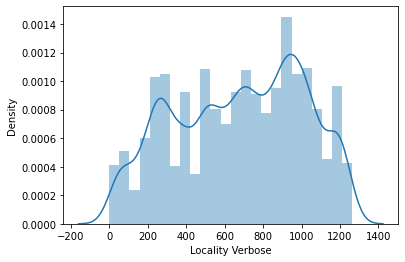



The Distribution Plot for attribute "Longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


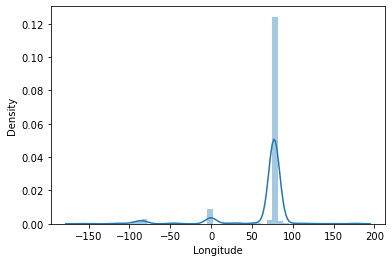



The Distribution Plot for attribute "Latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


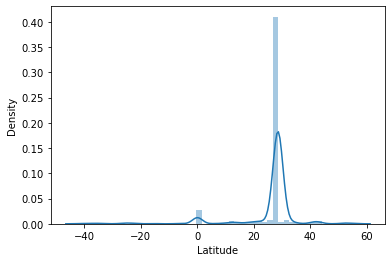



The Distribution Plot for attribute "Cuisines" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


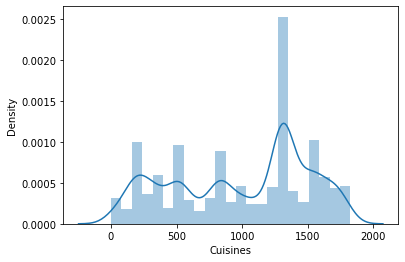



The Distribution Plot for attribute "Average Cost for two" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


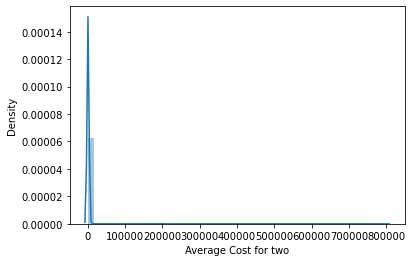



The Distribution Plot for attribute "Currency" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


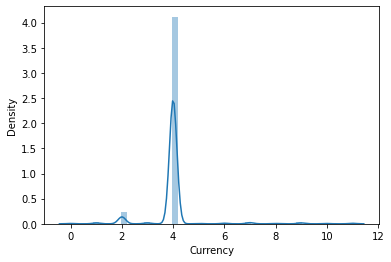



The Distribution Plot for attribute "Has Table booking" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


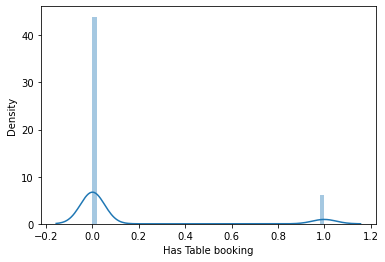



The Distribution Plot for attribute "Has Online delivery" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


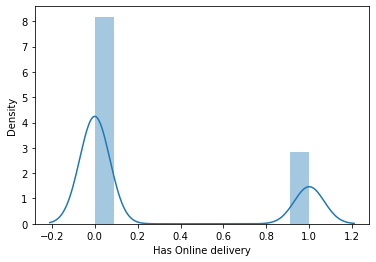



The Distribution Plot for attribute "Is delivering now" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


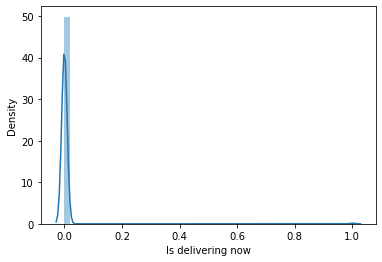



The Distribution Plot for attribute "Price range" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


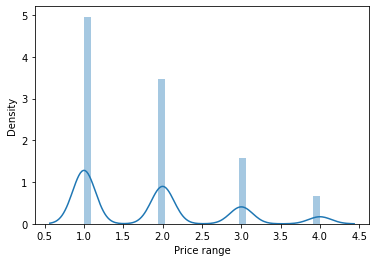



The Distribution Plot for attribute "Aggregate rating" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


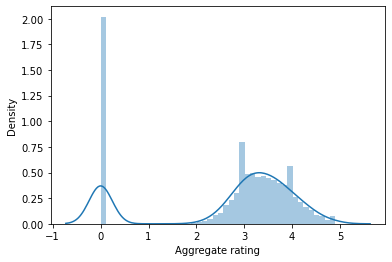



The Distribution Plot for attribute "Rating color" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


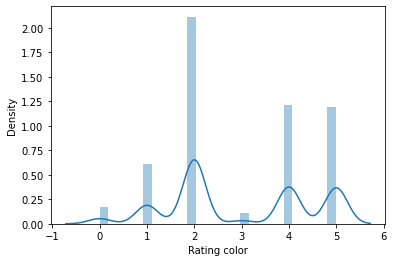



The Distribution Plot for attribute "Rating text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


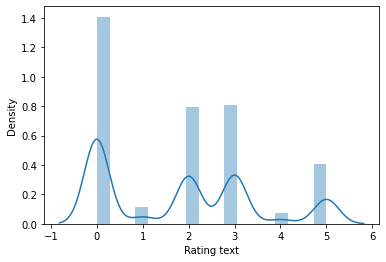



The Distribution Plot for attribute "Votes" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


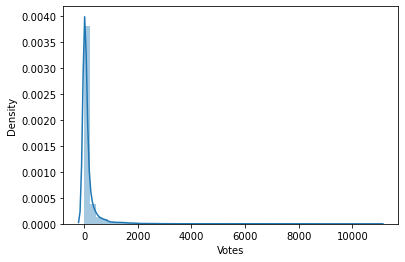



The Distribution Plot for attribute "Country" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


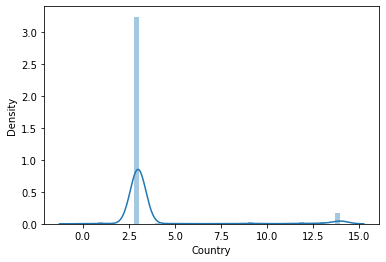

In [46]:
for i in df.columns:
    print(f'The Distribution Plot for attribute "{i}" is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

###### As we can see in the above distribution plots all of the attributes are skewed both right ad left hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method

###### Outliers

In [47]:
z=np.abs(zscore(df))
np.where(z>3)

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64),
 array([11, 11, 11, ..., 11,  2, 11], dtype=int64))

In [48]:
print(z.iloc[31,8])
print(z.iloc[0,11])
print(z.iloc[248,7])

3.787076867595232
4.351045700874271
3.8077181202424786


Boxplot

The Box-Plot for attribute "Restaurant ID" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


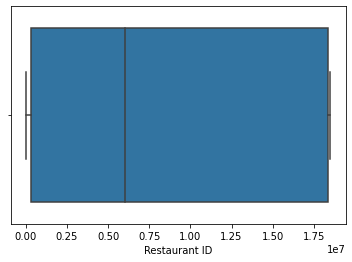



The Box-Plot for attribute "Restaurant Name" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


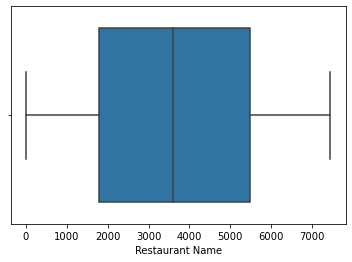



The Box-Plot for attribute "Country Code" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


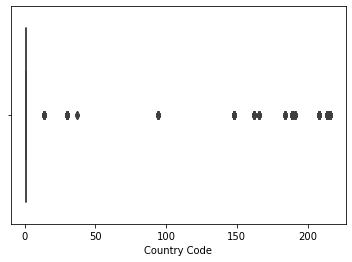



The Box-Plot for attribute "City" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


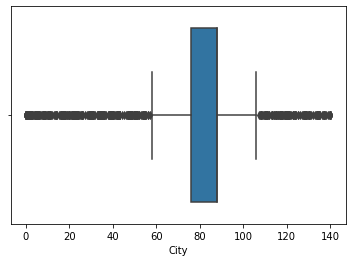



The Box-Plot for attribute "Address" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


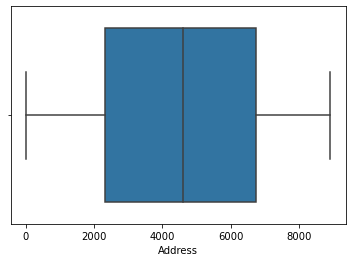



The Box-Plot for attribute "Locality" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


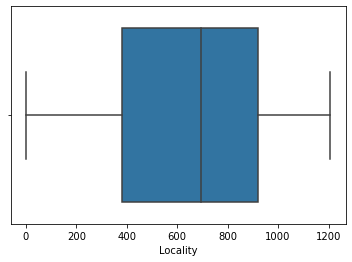



The Box-Plot for attribute "Locality Verbose" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


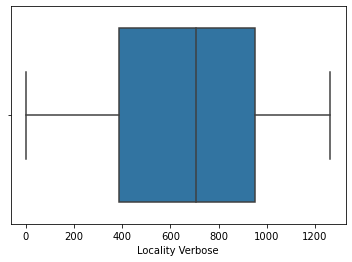



The Box-Plot for attribute "Longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


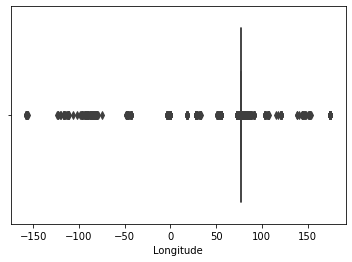



The Box-Plot for attribute "Latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


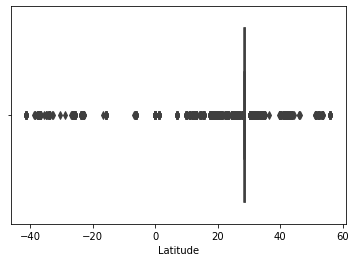



The Box-Plot for attribute "Cuisines" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


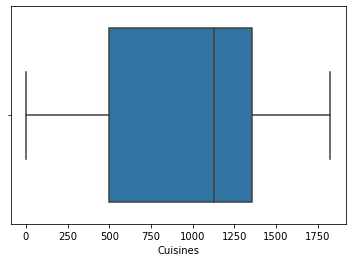



The Box-Plot for attribute "Average Cost for two" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


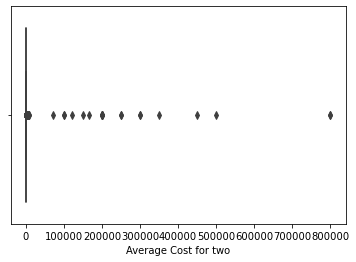



The Box-Plot for attribute "Currency" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


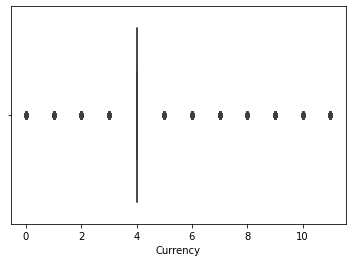



The Box-Plot for attribute "Has Table booking" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


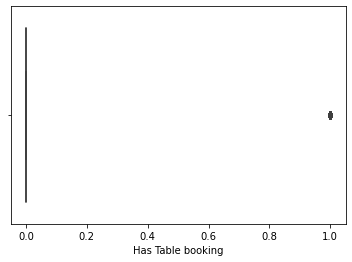



The Box-Plot for attribute "Has Online delivery" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


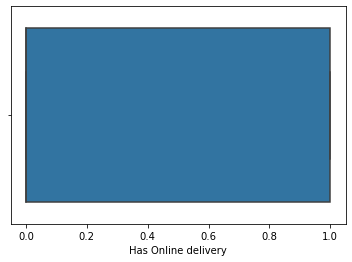



The Box-Plot for attribute "Is delivering now" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


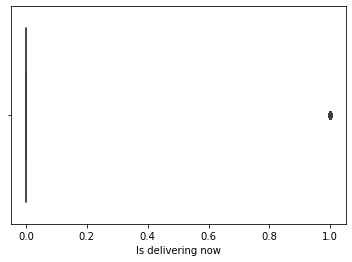



The Box-Plot for attribute "Price range" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


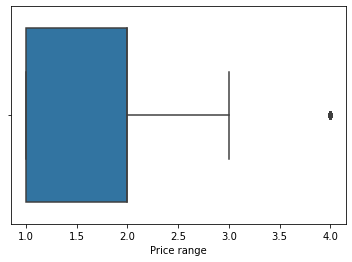



The Box-Plot for attribute "Aggregate rating" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


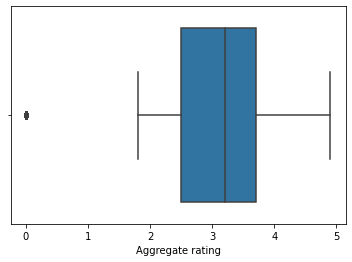



The Box-Plot for attribute "Rating color" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


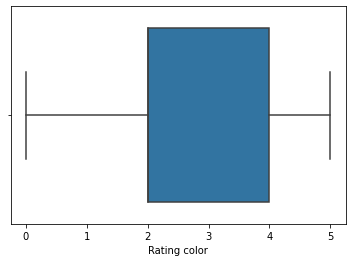



The Box-Plot for attribute "Rating text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


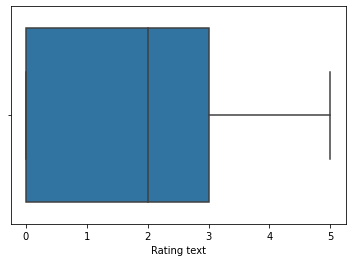



The Box-Plot for attribute "Votes" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


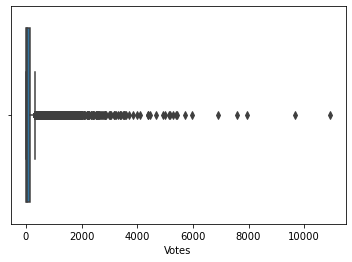



The Box-Plot for attribute "Country" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


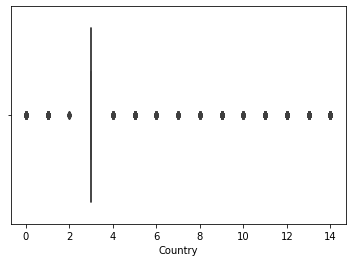

In [49]:
for i in df.columns:
    print(f'The Box-Plot for attribute "{i}" is-\n {sns.boxplot(df[i])}')
    plt.show()
    print('\n')

#### Data Cleansing

Remove Negative Correlation
will not remove any columns for the same and will first see the multicoolinearity presence then will remove columns

Removing Multicollinearity

In [50]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
#calculating variance_inflation_factor Score
x=df.drop('Average Cost for two',axis=1)
def vif():
    df1=pd.DataFrame()
    df1['Features']=x.columns
    df1['VIF_Score']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df1)

In [52]:
vif()

               Features    VIF_Score
0         Restaurant ID     2.626347
1       Restaurant Name     3.891669
2          Country Code    29.287518
3                  City    11.717534
4               Address     4.454212
5              Locality  5068.289942
6      Locality Verbose  4903.577395
7             Longitude    13.232242
8              Latitude    17.132415
9              Cuisines     4.808214
10             Currency    23.623635
11    Has Table booking     1.637369
12  Has Online delivery     1.561500
13    Is delivering now     1.018137
14          Price range     9.313430
15     Aggregate rating     7.443984
16         Rating color     5.882624
17          Rating text     2.892559
18                Votes     1.451000
19              Country   104.342312


In [53]:
df2=df.drop('Locality',axis=1)
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,172,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,601,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,314,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,875,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,875,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,523,28.977392,41.022793,1813,80,11,0,0,0,3,4.1,1,5,788,11
9547,5908749,1311,208,140,5962,558,29.041297,41.009847,1824,105,11,0,0,0,3,4.2,1,5,1034,11
9548,5915807,3069,208,140,5966,561,29.034640,41.055817,1110,170,11,0,0,0,4,3.7,5,2,661,11
9549,5916112,513,208,140,5967,561,29.036019,41.057979,1657,120,11,0,0,0,4,4.0,1,5,901,11


Removing Outliers

In [54]:
df3=df2[(z<3).all(axis=1)]
df3

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
544,18483372,5897,184,118,123,107,103.860005,1.282661,515,300,2,0,0,0,4,3.4,2,0,34,8
545,18484349,1829,184,118,1068,108,103.859422,1.285477,102,270,2,0,0,0,4,4.0,1,5,33,8
546,18496057,5319,184,118,2208,160,103.840360,1.279420,922,500,2,0,0,0,4,3.8,5,2,33,8
547,18483389,5006,184,118,1986,189,103.841669,1.280503,6,80,2,0,0,0,4,3.1,2,0,34,8
548,18483222,3189,184,118,1071,201,103.853605,1.293221,916,430,2,0,0,0,4,3.8,5,2,35,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,2800418,3364,1,134,7066,1047,0.000000,0.000000,465,400,4,0,0,0,2,3.7,5,2,85,3
9273,2800881,4988,1,134,7009,1047,83.315281,17.719539,322,600,4,0,0,0,2,4.3,1,5,172,3
9274,2800042,7201,1,134,8664,1134,83.336840,17.721182,88,1500,4,0,0,0,4,3.8,5,2,74,3
9275,2800019,2384,1,134,151,1226,83.314942,17.721119,1031,1400,4,0,0,0,3,4.4,1,5,316,3


In [55]:
print(df2.shape)
print(df3.shape)

(9551, 20)
(8408, 20)


In [56]:
percentage_loss=(9551-8408)*100/9551
percentage_loss

11.967333263532614

I'm getting the percentage loss is about 12% which is decent because our dataset is large having 9551 rows and out of it we are loosing only 12% rows.Now we can move ahead by considering it

Removing Skewness

In [57]:
df3.skew().sort_values()

Currency               -18.026851
Longitude               -3.702347
Latitude                -3.241005
City                    -1.392152
Aggregate rating        -0.861415
Cuisines                -0.345840
Locality Verbose        -0.241733
Address                 -0.121484
Is delivering now        0.000000
Restaurant Name          0.045448
Rating color             0.101035
Restaurant ID            0.108162
Rating text              0.422542
Has Online delivery      1.001452
Price range              1.054225
Has Table booking        2.269837
Average Cost for two     3.716607
Votes                    3.730394
Country Code            19.985320
Country                 20.254626
dtype: float64

Power_transformed Method

In [58]:
from sklearn.preprocessing import power_transform

In [59]:
x=df3.drop(['Average Cost for two'],axis=1)
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
544,18483372,5897,184,118,123,107,103.860005,1.282661,515,2,0,0,0,4,3.4,2,0,34,8
545,18484349,1829,184,118,1068,108,103.859422,1.285477,102,2,0,0,0,4,4.0,1,5,33,8
546,18496057,5319,184,118,2208,160,103.840360,1.279420,922,2,0,0,0,4,3.8,5,2,33,8
547,18483389,5006,184,118,1986,189,103.841669,1.280503,6,2,0,0,0,4,3.1,2,0,34,8
548,18483222,3189,184,118,1071,201,103.853605,1.293221,916,2,0,0,0,4,3.8,5,2,35,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,2800418,3364,1,134,7066,1047,0.000000,0.000000,465,4,0,0,0,2,3.7,5,2,85,3
9273,2800881,4988,1,134,7009,1047,83.315281,17.719539,322,4,0,0,0,2,4.3,1,5,172,3
9274,2800042,7201,1,134,8664,1134,83.336840,17.721182,88,4,0,0,0,4,3.8,5,2,74,3
9275,2800019,2384,1,134,151,1226,83.314942,17.721119,1031,4,0,0,0,3,4.4,1,5,316,3


In [60]:
x=power_transform(x)
x

array([[ 9.84455812e-01,  1.02008354e+00,  0.00000000e+00, ...,
        -1.09801061e+00,  2.62561086e-01,  1.38777878e-17],
       [ 9.84482263e-01, -7.61499406e-01,  0.00000000e+00, ...,
         1.56707761e+00,  2.47370569e-01,  1.38777878e-17],
       [ 9.84799151e-01,  8.00249015e-01,  0.00000000e+00, ...,
         4.90893758e-01,  2.47370569e-01,  1.38777878e-17],
       ...,
       [ 1.61163527e-01,  1.49223230e+00,  0.00000000e+00, ...,
         4.90893758e-01,  6.63452577e-01,  0.00000000e+00],
       [ 1.61160423e-01, -4.72311649e-01,  0.00000000e+00, ...,
         1.56707761e+00,  1.42961845e+00,  0.00000000e+00],
       [ 9.83574259e-01,  1.52200976e+00,  0.00000000e+00, ...,
         1.56707761e+00,  2.15614577e-01,  1.38777878e-17]])

###### Standard Scaler

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [62]:
x=sc.fit_transform(x)
x

array([[ 0.98445581,  1.02008354,  0.        , ..., -1.09801061,
         0.26256109, 19.98451782],
       [ 0.98448226, -0.76149941,  0.        , ...,  1.56707761,
         0.24737057, 19.98451782],
       [ 0.98479915,  0.80024901,  0.        , ...,  0.49089376,
         0.24737057, 19.98451782],
       ...,
       [ 0.16116353,  1.4922323 ,  0.        , ...,  0.49089376,
         0.66345258, -0.05003874],
       [ 0.16116042, -0.47231165,  0.        , ...,  1.56707761,
         1.42961845, -0.05003874],
       [ 0.98357426,  1.52200976,  0.        , ...,  1.56707761,
         0.21561458, 19.98451782]])

In [63]:
x.mean()

1.7791144668238274e-18

In [64]:
x.std()

0.9459053029269174

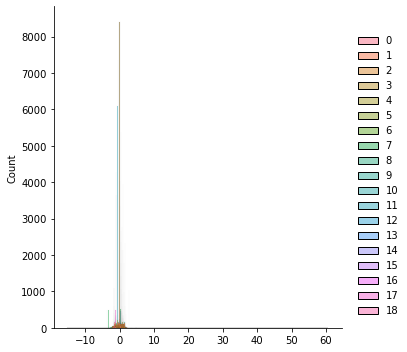

In [65]:
sns.displot(x)

Principle Component Analysis(PCA)

In [66]:
from sklearn.decomposition import PCA

In [67]:
#reducing the columns into 5 principle components
pca=PCA(n_components=5)
x=pca.fit_transform(x)
x

array([[  2.67904484, -14.58198029,  21.04695314,   0.96087795,
          3.25100105],
       [  2.46002112, -15.28962652,  20.54124378,   1.72491969,
          3.70930158],
       [  1.90017598, -15.29096176,  20.36041583,   2.7483168 ,
          3.09560397],
       ...,
       [  0.12575325,  -2.86072318,   0.46075566,   0.52517503,
         -0.39643628],
       [  1.42752672,  -2.69404064,   1.01016554,  -1.28035413,
         -2.07039867],
       [  6.58049664,  23.50366646,  -7.93904114,  14.26746482,
         -4.50821642]])

In [68]:
#target variable
y=df3['Average Cost for two']
y

544      300
545      270
546      500
547       80
548      430
        ... 
9272     400
9273     600
9274    1500
9275    1400
9312      50
Name: Average Cost for two, Length: 8408, dtype: int64

In [69]:
print(x.shape)
print(y.shape)

(8408, 5)
(8408,)


Plotting the Relationship b/w Principle Components

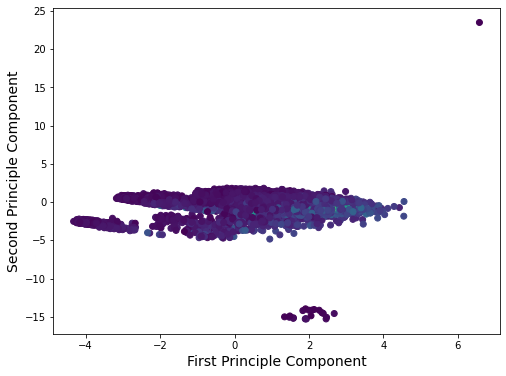

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('First Principle Component',fontsize=14)
plt.ylabel('Second Principle Component',fontsize=14)
plt.show()

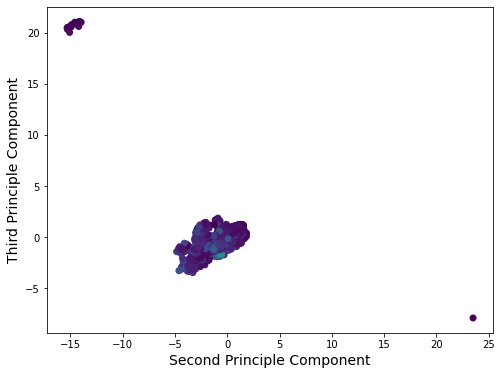

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,1],x[:,2],c=y)
plt.xlabel('Second Principle Component',fontsize=14)
plt.ylabel('Third Principle Component',fontsize=14)
plt.show()

#### Training_Testing Phase
I am going to train 80% of the data and testing size would be 20%
first will try to find out the best value for random_state

In [72]:
#importing machine learning libraries for regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr=LinearRegression()

In [73]:
#will finding best value of random_state
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if(r2_score(train_pred,y_train))==(r2_score(test_pred,y_test)):
        print(f'At Random_State {i} the training accuracy and testing accuracy both are same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'The Mean Absolute Error is(MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is(MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error(RMSE) is- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')
    else:
        print(f'At Random_State {i} the training accuracy and testing accuracy both are not same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'\nThe Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')

At Random_State 0 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.1845315261685576
Testing Accuracy is -0.6527846637613153

The Mean Absolute Error is (MAE)- 249.42444475942966
The Mean Squared Error is (MSE)- 242333.40809908512
The Root Mean Squared Error is (RMSE)- 492.27371258181677


At Random_State 1 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.2310861824623862
Testing Accuracy is -0.21552314648589577

The Mean Absolute Error is (MAE)- 232.8457527252205
The Mean Squared Error is (MSE)- 179569.9969433665
The Root Mean Squared Error is (RMSE)- 423.7570022352038


At Random_State 2 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.256761677176786
Testing Accuracy is -0.21459761085296236

The Mean Absolute Error is (MAE)- 236.34070185840156
The Mean Squared Error is (MSE)- 188432.2383934769
The Root Mean Squared Error is (RMSE)- 434.08782336466993


At Random_State 3 the tra

Find out CV Score

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
for n in range(2,5):
    cvscore=cross_val_score(lr,x,y,cv=n)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {n} The CV Score of Linear Regression Model is {mean*100} and Standard Deviation is {std}')
    print('\n')

At K-Fold 2 The CV Score of Linear Regression Model is 40.95802319260499 and Standard Deviation is 0.006330078252142768


At K-Fold 3 The CV Score of Linear Regression Model is 41.10327490103807 and Standard Deviation is 0.04460030760550948


At K-Fold 4 The CV Score of Linear Regression Model is 40.449084681977396 and Standard Deviation is 0.07099643458707633




In [76]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
en=ElasticNet()
sgd=SGDRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [77]:
#creating a definition to expand the model individually
def model(m,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {r2_score(train_pred,y_train)}')
    print(f'Testing Accuracy of model {m} is {r2_score(test_pred,y_test)}')
    print('\nError in the model is calculated below-\n')
    print(f'The Mean Absolute Error is (MAE) {mean_absolute_error(test_pred,y_test)}')
    print(f'The Mean Squared Error is (MSE) {mean_squared_error(test_pred,y_test)}')
    print(f'The Root Mean Squared Error is (RMSE) {np.sqrt(mean_squared_error(test_pred,y_test))}')
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for j in range(2,5):
        cvs=cross_val_score(m,x,y,cv=j)
        cvs.mean()
        cvs.std()
        print(f'At K-Fold {j} the CV Score of model {m} is {cvs.mean()*100} & std is {cvs.std()}')
        print('\n')
    print('\n\t')
    plt.scatter(y_test,test_pred,color='c')
    plt.plot(y_test,y_test,color='m')
    plt.xlabel("Actual Average Cost for two",fontsize=15)
    plt.ylabel("Predicted Average Cost for two",fontsize=15)
    plt.title(f"Best Fitted Line for the model {m}",fontsize=18)
    plt.show()

Training Accuracy of model Lasso() is -0.26470916767451924
Testing Accuracy of model Lasso() is -0.1517994236439204

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 238.67559420959432
The Mean Squared Error is (MSE) 182268.3717480025
The Root Mean Squared Error is (RMSE) 426.92900082800946


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso() is 41.00610114037917 & std is 0.006957309096509379


At K-Fold 3 the CV Score of model Lasso() is 41.15109291142392 & std is 0.044291348242750384


At K-Fold 4 the CV Score of model Lasso() is 40.503457842756674 & std is 0.07056577060338837



	


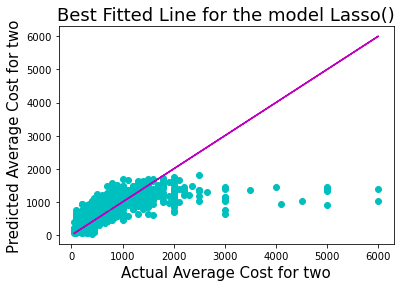

In [78]:
model(ls,x,y)

Training Accuracy of model Ridge() is -0.25554923701672694
Testing Accuracy of model Ridge() is -0.14379585721303223

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 239.113779866755
The Mean Squared Error is (MSE) 182333.63263099818
The Root Mean Squared Error is (RMSE) 427.00542459200466


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge() is 40.960468797831865 & std is 0.006353166707351421


At K-Fold 3 the CV Score of model Ridge() is 41.105906880588044 & std is 0.04457931703517277


At K-Fold 4 the CV Score of model Ridge() is 40.45280967233252 & std is 0.07095362605023989



	


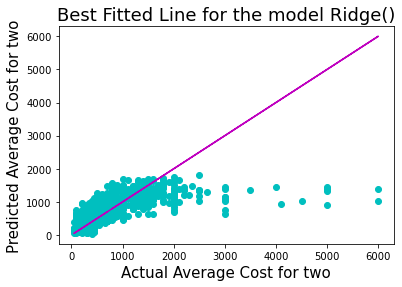

In [79]:
model(rd,x,y)

Training Accuracy of model ElasticNet() is -0.9493314093970522
Testing Accuracy of model ElasticNet() is -0.764609105158893

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 228.429374673038
The Mean Squared Error is (MSE) 185981.19115517553
The Root Mean Squared Error is (RMSE) 431.25536652333443


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet() is 41.49486439401797 & std is 0.02278860737491084


At K-Fold 3 the CV Score of model ElasticNet() is 41.966689781203286 & std is 0.04317715292628838


At K-Fold 4 the CV Score of model ElasticNet() is 42.32188026088003 & std is 0.0588193591931201



	


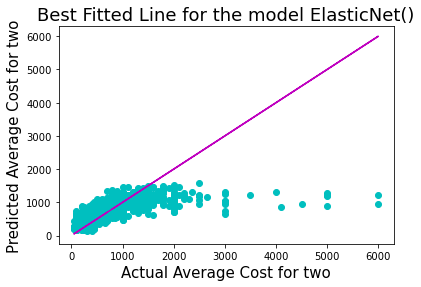

In [80]:
model(en,x,y)

Training Accuracy of model SGDRegressor() is -0.29197830622244925
Testing Accuracy of model SGDRegressor() is -0.1748169051307218

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 237.7118787716445
The Mean Squared Error is (MSE) 182339.42341624756
The Root Mean Squared Error is (RMSE) 427.01220523100693


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor() is 40.710194743337794 & std is 0.004438500349285779


At K-Fold 3 the CV Score of model SGDRegressor() is 40.921686021739205 & std is 0.0465325757246155


At K-Fold 4 the CV Score of model SGDRegressor() is 39.49115686383817 & std is 0.08173298159474875



	


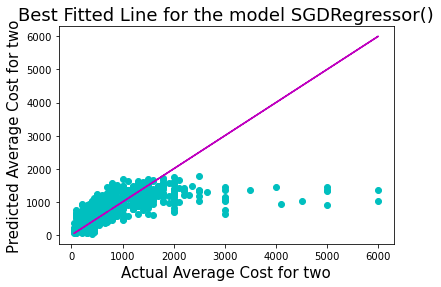

In [81]:
model(sgd,x,y)

Training Accuracy of model AdaBoostRegressor() is -0.4053042190029337
Testing Accuracy of model AdaBoostRegressor() is -0.47479475747246913

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 607.8853923505831
The Mean Squared Error is (MSE) 567493.271277121
The Root Mean Squared Error is (RMSE) 753.3214926424979


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is -65.39606644082802 & std is 0.9324303032937123


At K-Fold 3 the CV Score of model AdaBoostRegressor() is -124.63563391896184 & std is 1.641772111471955


At K-Fold 4 the CV Score of model AdaBoostRegressor() is -137.56742499452102 & std is 1.780463781039063



	


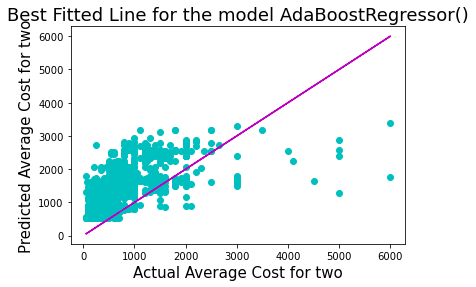

In [82]:
model(ad,x,y)

Training Accuracy of model RandomForestRegressor() is 0.9351027745869709
Testing Accuracy of model RandomForestRegressor() is 0.36506475072833855

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 192.1632877526754
The Mean Squared Error is (MSE) 142324.6084111177
The Root Mean Squared Error is (RMSE) 377.25933840147377


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor() is 17.574898126121063 & std is 0.3231671296399109


At K-Fold 3 the CV Score of model RandomForestRegressor() is 13.883421547136809 & std is 0.576083508194978


At K-Fold 4 the CV Score of model RandomForestRegressor() is 11.094967362699784 & std is 0.750820685283866



	


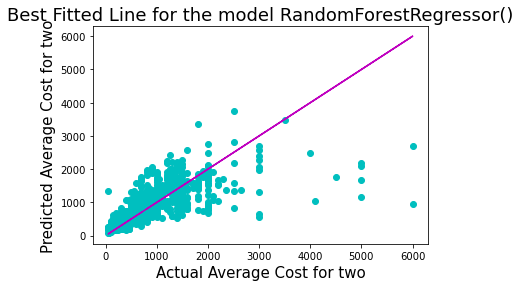

In [83]:
model(rf,x,y)

Training Accuracy of model GradientBoostingRegressor() is 0.3918217342907009
Testing Accuracy of model GradientBoostingRegressor() is 0.19008847316445665

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 197.8241588596273
The Mean Squared Error is (MSE) 150092.34800566218
The Root Mean Squared Error is (RMSE) 387.4175370393836


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor() is 38.87738632662157 & std is 0.1089180950786125


At K-Fold 3 the CV Score of model GradientBoostingRegressor() is 39.95368996065807 & std is 0.17359420443888318


At K-Fold 4 the CV Score of model GradientBoostingRegressor() is 39.905594706742534 & std is 0.2221902469449965



	


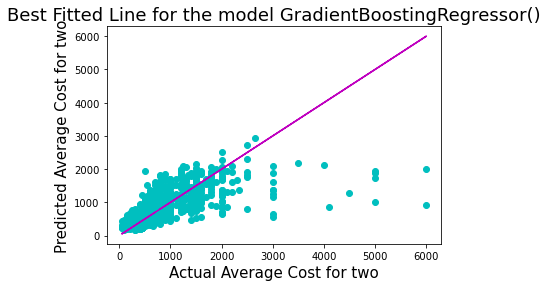

In [84]:
model(grd,x,y)

Hyper Parameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

In [88]:
#defining all the parameters of the respective models
dict_ls={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rd={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict_en={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict_ad={'loss':['linear', 'square', 'exponential']}
dict_grd={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}
dict_sgd={'alpha':[.0001,.001,.01,.1,1,10],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant', 'optimal', 'invscaling','adaptive'],'loss':['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive']}

In [90]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    grd=GridSearchCV(machine,dictionary)
    grd.fit(x,y)
    print(f'The best Parameters of the model {machine} are {grd.best_params_}')

In [91]:
HPT(ls,dict_ls)

The best Parameters of the model Lasso() are {'alpha': 10, 'selection': 'cyclic'}


In [92]:
HPT(rd,dict_rd)

The best Parameters of the model Ridge() are {'alpha': 10, 'solver': 'saga'}


In [93]:
HPT(en,dict_en)


The best Parameters of the model ElasticNet() are {'alpha': 1, 'selection': 'random'}


In [95]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostRegressor() are {'loss': 'linear'}


In [97]:
HPT(rf,dict_rf)

KeyboardInterrupt: 

In [98]:
#Redefining the models after getting the parameters
ls=Lasso(alpha=10,selection='cyclic')
rd=Ridge(alpha=10,solver='saga')
en=ElasticNet(alpha=1,selection='cyclic')
rf=RandomForestRegressor(criterion='poisson',max_features='sqrt')
ad=AdaBoostRegressor(loss='linear')
grd=GradientBoostingRegressor(criterion='mse',loss='huber',max_features='sqrt')
sgd=SGDRegressor(alpha=1,learning_rate='optimal',penalty='elasticnet',loss='squared_epsilon_insensitive')

Training Accuracy of model Lasso(alpha=10) is -0.3547091094111572
Testing Accuracy of model Lasso(alpha=10) is -0.23068474851784937

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 234.98154560499796
The Mean Squared Error is (MSE) 181954.47989436093
The Root Mean Squared Error is (RMSE) 426.5612264310493


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso(alpha=10) is 41.34089533883791 & std is 0.012134590746383789


At K-Fold 3 the CV Score of model Lasso(alpha=10) is 41.47664951973009 & std is 0.0424994329503951


At K-Fold 4 the CV Score of model Lasso(alpha=10) is 40.89350794685224 & std is 0.0674129750481649



	


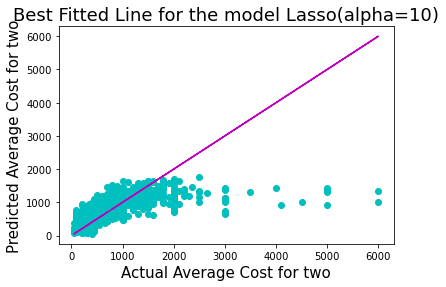

In [99]:
model(ls,x,y)

Training Accuracy of model Ridge(alpha=10, solver='saga') is -0.2570385122000429
Testing Accuracy of model Ridge(alpha=10, solver='saga') is -0.1451082101064971

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 239.04625604194308
The Mean Squared Error is (MSE) 182324.9607302842
The Root Mean Squared Error is (RMSE) 426.9952701497807


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge(alpha=10, solver='saga') is 40.98262863015567 & std is 0.006678773564415874


At K-Fold 3 the CV Score of model Ridge(alpha=10, solver='saga') is 41.14691532998808 & std is 0.044243370631665224


At K-Fold 4 the CV Score of model Ridge(alpha=10, solver='saga') is 40.51086384489141 & std is 0.07019681622712731



	


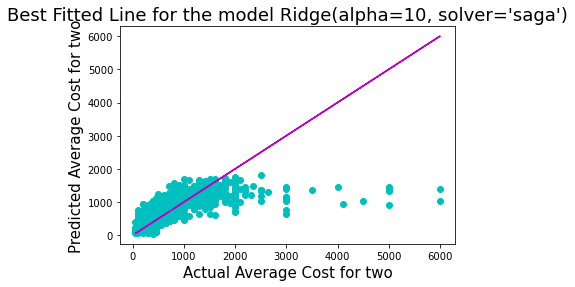

In [100]:
model(rd,x,y)

Training Accuracy of model ElasticNet(alpha=1) is -0.9493314093970522
Testing Accuracy of model ElasticNet(alpha=1) is -0.764609105158893

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 228.429374673038
The Mean Squared Error is (MSE) 185981.19115517553
The Root Mean Squared Error is (RMSE) 431.25536652333443


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet(alpha=1) is 41.49486439401797 & std is 0.02278860737491084


At K-Fold 3 the CV Score of model ElasticNet(alpha=1) is 41.966689781203286 & std is 0.04317715292628838


At K-Fold 4 the CV Score of model ElasticNet(alpha=1) is 42.32188026088003 & std is 0.0588193591931201



	


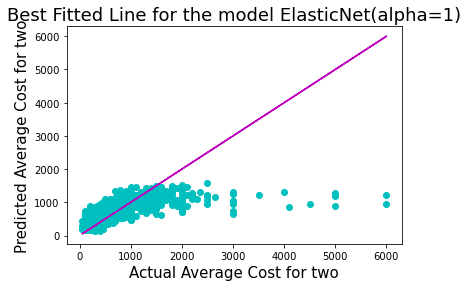

In [101]:
model(en,x,y)

Training Accuracy of model SGDRegressor(alpha=1, learning_rate='optimal',
             loss='squared_epsilon_insensitive', penalty='elasticnet') is -0.8314358951515204
Testing Accuracy of model SGDRegressor(alpha=1, learning_rate='optimal',
             loss='squared_epsilon_insensitive', penalty='elasticnet') is -0.658321369787138

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 228.67347208801937
The Mean Squared Error is (MSE) 184871.75499774446
The Root Mean Squared Error is (RMSE) 429.9671557197648


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor(alpha=1, learning_rate='optimal',
             loss='squared_epsilon_insensitive', penalty='elasticnet') is 41.770575767376044 & std is 0.021240989476921823


At K-Fold 3 the CV Score of model SGDRegressor(alpha=1, learning_rate='optimal',
             loss='squared_epsilon_insensitive', penalty='elasticnet') is 42.07280848046494 & std is 0.0417230513990234


At K-Fold 4 the C

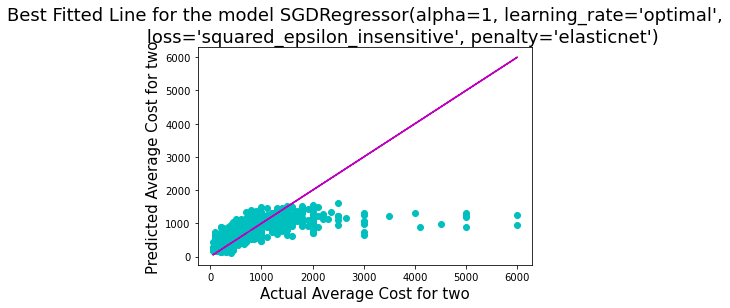

In [102]:
model(sgd,x,y)

Training Accuracy of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 0.9179536626298822
Testing Accuracy of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 0.2489070645160416

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 207.56774861748107
The Mean Squared Error is (MSE) 159771.21670186214
The Root Mean Squared Error is (RMSE) 399.71391857409986


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 17.978218567125538 & std is 0.27236073180763176


At K-Fold 3 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 9.808770833884106 & std is 0.5687230547548895


At K-Fold 4 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 7.79573228470323 & std is 0.7684419387666596



	


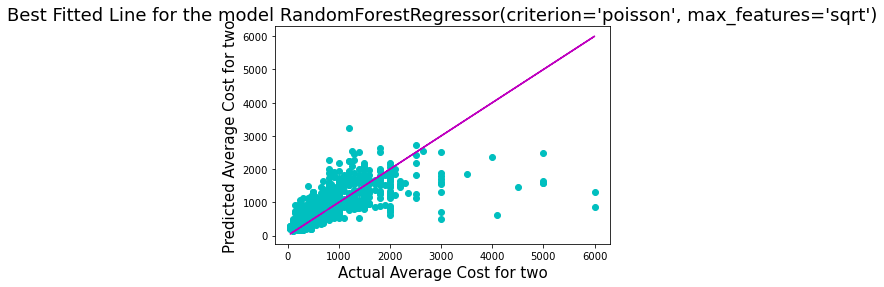

In [103]:
model(rf,x,y)

Training Accuracy of model AdaBoostRegressor() is -0.5406966475627539
Testing Accuracy of model AdaBoostRegressor() is -0.6196696911199224

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 635.9367123198016
The Mean Squared Error is (MSE) 612956.884290053
The Root Mean Squared Error is (RMSE) 782.9156303779182


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is -53.85301054948491 & std is 0.8216811454829628


At K-Fold 3 the CV Score of model AdaBoostRegressor() is -61.84258777229815 & std is 0.8224710685589325


At K-Fold 4 the CV Score of model AdaBoostRegressor() is -142.3394569335374 & std is 2.0399357675844922



	


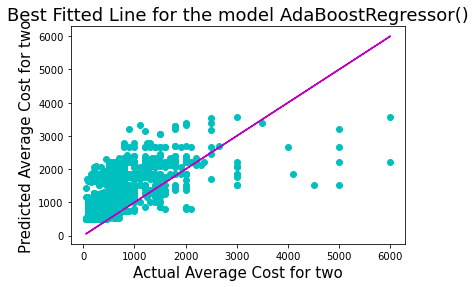

In [104]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt') is -0.26184935600863546
Testing Accuracy of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt') is -0.2836569559395019

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 190.3891682056814
The Mean Squared Error is (MSE) 160728.61758958295
The Root Mean Squared Error is (RMSE) 400.9097374591729


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt') is 47.05592734872177 & std is 0.024679510014494366


At K-Fold 3 the CV Score of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt') is 47.79158167548636 & std is 0.058761192798410335


At K-Fold 4 the CV Score of model GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt') is 48.011581537818195 & std is 0.09268845545789324



	


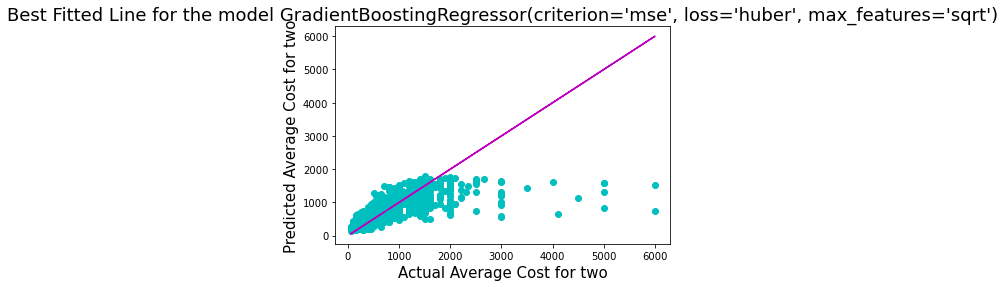

In [105]:
model(grd,x,y)

###### Saving the Best Model

In [106]:
import joblib
file='Zomato.obj'
joblib.dump(rf,file)

['Zomato.obj']

###### Loading the Model

In [107]:
a=joblib.load('Zomato.obj')
a

RandomForestRegressor(criterion='poisson', max_features='sqrt')

In [108]:
pred=a.predict(x_test)
pred

array([ 638. ,  611.5,  511. , ..., 1493.5,  197.5,  850. ])

In [109]:
#Accuracy of RandomForestRegressor
accuracy_score=r2_score(pred,y_test)
accuracy_score

0.8007664028307964

<AxesSubplot:ylabel='Density'>

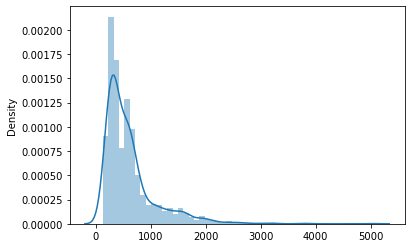

In [110]:
sns.distplot(pred)

Text(0.5, 1.0, 'Best Fitted Line of the Model')

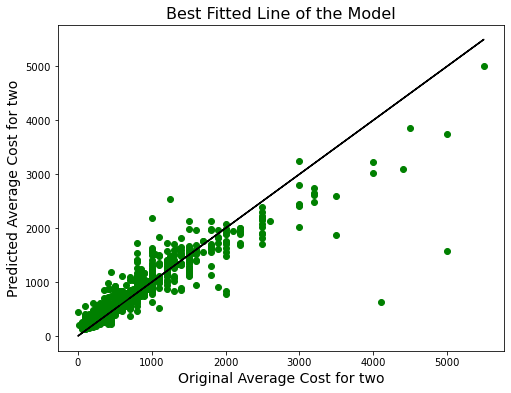

In [111]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='GREEN')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Original Average Cost for two',fontsize=14)
plt.ylabel('Predicted Average Cost for two',fontsize=14)
plt.title('Best Fitted Line of the Model',fontsize=16)

In [112]:
conclusion=pd.DataFrame(data=([pred,y_test]),index=['Predicted Average Cost for two','Original Average Cost for two'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
Predicted Average Cost for two,638.0,611.5,511.0,517.0,326.5,517.5,823.0,768.5,244.0,603.5,...,1629.0,222.0,263.0,280.4,175.5,252.0,836.5,1493.5,197.5,850.0
Original Average Cost for two,550.0,550.0,450.0,500.0,300.0,500.0,600.0,600.0,150.0,500.0,...,1000.0,200.0,200.0,300.0,200.0,250.0,800.0,1300.0,150.0,700.0


As our model accuracy is 84% and its prediction is almost same as original one hence Random Forest Regressor is one of the best model among all which have less RMSE, high Training ,Testing and CV score.Also,this model training accuracy is 94% that's why model testing accuracy was 80% as model got lot's of data for the training.

Classification Model Building(Taking Price range as Target)
I've already done the EDA process in the first part hence will start by checking Correlation,outliers,skewness and all and later on will built a classification model

###### Correlation

In [113]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,...,0,1,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,0,1,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,...,11,0,0,0,3,4.1,1,5,788,11
9547,5908749,1311,208,140,5962,552,558,29.041297,41.009847,1824,...,11,0,0,0,3,4.2,1,5,1034,11
9548,5915807,3069,208,140,5966,554,561,29.034640,41.055817,1110,...,11,0,0,0,4,3.7,5,2,661,11
9549,5916112,513,208,140,5967,554,561,29.036019,41.057979,1657,...,11,0,0,0,4,4.0,1,5,901,11


In [114]:
df.corr()['Price range'].sort_values()

Latitude               -0.166688
Rating color           -0.140468
Restaurant ID          -0.134540
Locality               -0.114460
Locality Verbose       -0.112314
City                   -0.105759
Longitude              -0.078939
Address                -0.034952
Cuisines               -0.005489
Is delivering now       0.010940
Restaurant Name         0.061275
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Country Code            0.243327
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
Name: Price range, dtype: float64

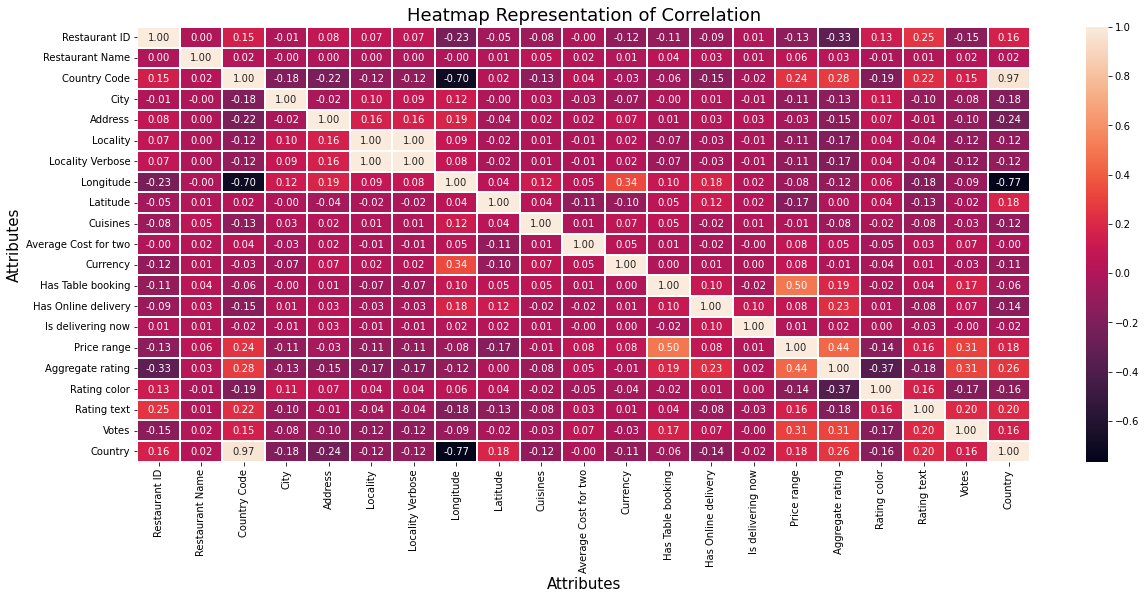

In [115]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,linecolor='white',fmt='0.2f')
plt.xlabel('Attributes',fontsize=15)
plt.ylabel('Attributes',fontsize=15)
plt.title('Heatmap Representation of Correlation',fontsize=18)
plt.show()

###### Multicollinearity

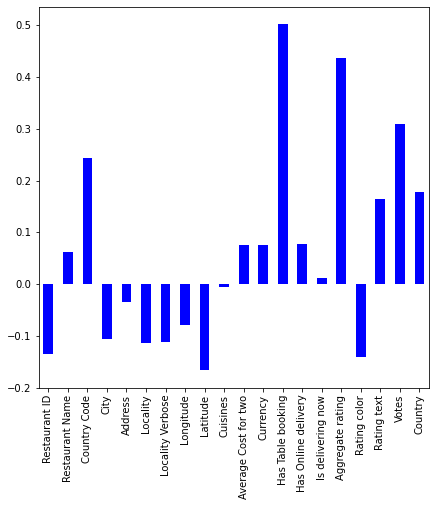

In [116]:
plt.figure(figsize=(7,7))
df.corr()['Price range'].drop(['Price range']).plot(kind='bar',color='blue')
plt.show()

###### Skewness

In [117]:
df.skew().sort_values()

Latitude                -3.081635
Longitude               -2.807328
City                    -1.193777
Aggregate rating        -0.954130
Cuisines                -0.305484
Locality                -0.253554
Locality Verbose        -0.183064
Address                 -0.040407
Restaurant Name          0.044637
Rating color             0.046009
Restaurant ID            0.061570
Rating text              0.431408
Price range              0.889618
Has Online delivery      1.114620
Has Table booking        2.321100
Currency                 2.858093
Country Code             3.043965
Country                  3.312721
Votes                    8.807637
Is delivering now       16.673412
Average Cost for two    35.477915
dtype: float64

###### Outliers

In [118]:
z1=np.abs(zscore(df))
np.where(z1>3)

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64),
 array([11, 11, 11, ..., 11,  2, 11], dtype=int64))

In [119]:
print(z1.iloc[0,11])
print(z1.iloc[1,11])
print(z1.iloc[2,11])

4.351045700874271
4.351045700874271
4.351045700874271


###### Data Cleansing

In [120]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
x=df.drop(['Price range'],axis=1)
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,1100,0,1,0,0,4.8,0,1,314,6
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,1200,0,1,0,0,4.5,0,1,591,6
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,4000,0,1,0,0,4.4,1,5,270,6
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,1500,0,0,0,0,4.9,0,1,365,6
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,1500,0,1,0,0,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,80,11,0,0,0,4.1,1,5,788,11
9547,5908749,1311,208,140,5962,552,558,29.041297,41.009847,1824,105,11,0,0,0,4.2,1,5,1034,11
9548,5915807,3069,208,140,5966,554,561,29.034640,41.055817,1110,170,11,0,0,0,3.7,5,2,661,11
9549,5916112,513,208,140,5967,554,561,29.036019,41.057979,1657,120,11,0,0,0,4.0,1,5,901,11


In [122]:
def vif():
    df5=pd.DataFrame()
    df5['Features']=x.columns
    df5['Variance_Inflation_Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(df5)

In [123]:
vif()

                Features  Variance_Inflation_Factor
0          Restaurant ID                   2.629378
1        Restaurant Name                   3.879209
2           Country Code                  29.518146
3                   City                  11.677346
4                Address                   4.425089
5               Locality                5066.744050
6       Locality Verbose                4901.916378
7              Longitude                  13.200357
8               Latitude                  16.835517
9               Cuisines                   4.783426
10  Average Cost for two                   1.045694
11              Currency                  23.279163
12     Has Table booking                   1.250201
13   Has Online delivery                   1.562307
14     Is delivering now                   1.017433
15      Aggregate rating                   6.408669
16          Rating color                   5.853032
17           Rating text                   2.799998
18          

In [124]:
df6=df.drop('Locality',axis=1)
df6

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,172,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,601,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,314,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,875,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,875,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,523,28.977392,41.022793,1813,80,11,0,0,0,3,4.1,1,5,788,11
9547,5908749,1311,208,140,5962,558,29.041297,41.009847,1824,105,11,0,0,0,3,4.2,1,5,1034,11
9548,5915807,3069,208,140,5966,561,29.034640,41.055817,1110,170,11,0,0,0,4,3.7,5,2,661,11
9549,5916112,513,208,140,5967,561,29.036019,41.057979,1657,120,11,0,0,0,4,4.0,1,5,901,11


###### Removing Outliers

In [125]:
df7=df6[(z1<3).all(axis=1)]
df7

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
544,18483372,5897,184,118,123,107,103.860005,1.282661,515,300,2,0,0,0,4,3.4,2,0,34,8
545,18484349,1829,184,118,1068,108,103.859422,1.285477,102,270,2,0,0,0,4,4.0,1,5,33,8
546,18496057,5319,184,118,2208,160,103.840360,1.279420,922,500,2,0,0,0,4,3.8,5,2,33,8
547,18483389,5006,184,118,1986,189,103.841669,1.280503,6,80,2,0,0,0,4,3.1,2,0,34,8
548,18483222,3189,184,118,1071,201,103.853605,1.293221,916,430,2,0,0,0,4,3.8,5,2,35,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,2800418,3364,1,134,7066,1047,0.000000,0.000000,465,400,4,0,0,0,2,3.7,5,2,85,3
9273,2800881,4988,1,134,7009,1047,83.315281,17.719539,322,600,4,0,0,0,2,4.3,1,5,172,3
9274,2800042,7201,1,134,8664,1134,83.336840,17.721182,88,1500,4,0,0,0,4,3.8,5,2,74,3
9275,2800019,2384,1,134,151,1226,83.314942,17.721119,1031,1400,4,0,0,0,3,4.4,1,5,316,3


In [126]:
print(df6.shape)
print(df7.shape)

(9551, 20)
(8408, 20)


In [127]:
percentage_loss=(9551-8408)*100/9551
percentage_loss

11.967333263532614

#### Removing Skewness
Power_transform

In [128]:
x=df7.drop('Price range',axis=1)
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
544,18483372,5897,184,118,123,107,103.860005,1.282661,515,300,2,0,0,0,3.4,2,0,34,8
545,18484349,1829,184,118,1068,108,103.859422,1.285477,102,270,2,0,0,0,4.0,1,5,33,8
546,18496057,5319,184,118,2208,160,103.840360,1.279420,922,500,2,0,0,0,3.8,5,2,33,8
547,18483389,5006,184,118,1986,189,103.841669,1.280503,6,80,2,0,0,0,3.1,2,0,34,8
548,18483222,3189,184,118,1071,201,103.853605,1.293221,916,430,2,0,0,0,3.8,5,2,35,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,2800418,3364,1,134,7066,1047,0.000000,0.000000,465,400,4,0,0,0,3.7,5,2,85,3
9273,2800881,4988,1,134,7009,1047,83.315281,17.719539,322,600,4,0,0,0,4.3,1,5,172,3
9274,2800042,7201,1,134,8664,1134,83.336840,17.721182,88,1500,4,0,0,0,3.8,5,2,74,3
9275,2800019,2384,1,134,151,1226,83.314942,17.721119,1031,1400,4,0,0,0,4.4,1,5,316,3


In [129]:
x=power_transform(x)
x

array([[ 9.84455812e-01,  1.02008354e+00,  0.00000000e+00, ...,
        -1.09801061e+00,  2.62561086e-01,  1.38777878e-17],
       [ 9.84482263e-01, -7.61499406e-01,  0.00000000e+00, ...,
         1.56707761e+00,  2.47370569e-01,  1.38777878e-17],
       [ 9.84799151e-01,  8.00249015e-01,  0.00000000e+00, ...,
         4.90893758e-01,  2.47370569e-01,  1.38777878e-17],
       ...,
       [ 1.61163527e-01,  1.49223230e+00,  0.00000000e+00, ...,
         4.90893758e-01,  6.63452577e-01,  0.00000000e+00],
       [ 1.61160423e-01, -4.72311649e-01,  0.00000000e+00, ...,
         1.56707761e+00,  1.42961845e+00,  0.00000000e+00],
       [ 9.83574259e-01,  1.52200976e+00,  0.00000000e+00, ...,
         1.56707761e+00,  2.15614577e-01,  1.38777878e-17]])

Standard Scaler

In [130]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.98445581,  1.02008354,  0.        , ..., -1.09801061,
         0.26256109, 19.98451782],
       [ 0.98448226, -0.76149941,  0.        , ...,  1.56707761,
         0.24737057, 19.98451782],
       [ 0.98479915,  0.80024901,  0.        , ...,  0.49089376,
         0.24737057, 19.98451782],
       ...,
       [ 0.16116353,  1.4922323 ,  0.        , ...,  0.49089376,
         0.66345258, -0.05003874],
       [ 0.16116042, -0.47231165,  0.        , ...,  1.56707761,
         1.42961845, -0.05003874],
       [ 0.98357426,  1.52200976,  0.        , ...,  1.56707761,
         0.21561458, 19.98451782]])

-3.558228933647655e-19
0.9459053029269173


AxesSubplot(0.125,0.125;0.775x0.755)


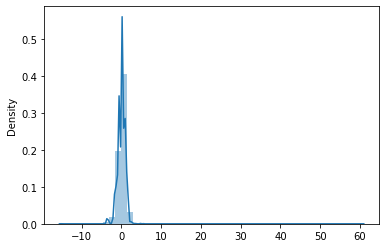

In [131]:
print(x.mean())
print(x.std())
print('\n')
print(sns.distplot(x))
plt.show()

Data is almost normal distributed

In [132]:
y=df7['Price range']
y

544     4
545     4
546     4
547     4
548     4
       ..
9272    2
9273    2
9274    4
9275    3
9312    3
Name: Price range, Length: 8408, dtype: int64

###### PCA Techniques

In [133]:
#reducing the dimension into 5 principle components
pca=PCA(n_components=5)
x=pca.fit_transform(x)
x

array([[ 4.43638822e-01,  1.65457568e+01, -1.89668861e+01,
         4.09515949e+00,  3.97941661e+00],
       [ 1.79851062e-01,  1.58856396e+01, -1.94629809e+01,
         4.84523865e+00,  4.40194451e+00],
       [-9.40599402e-02,  1.53463327e+01, -1.93679578e+01,
         5.95712214e+00,  3.86294700e+00],
       ...,
       [-7.82237814e-03, -4.91161735e-01, -2.69607503e+00,
         8.15213587e-01, -2.98007216e-01],
       [ 1.33309331e+00,  2.54437483e-01, -2.98245450e+00,
        -9.04041179e-01, -1.94314731e+00],
       [ 5.72075893e+00,  5.38293282e-01,  2.70581042e+01,
         9.71889110e+00, -6.33072457e+00]])

Plotting the Relationship b/w the Principle Variables

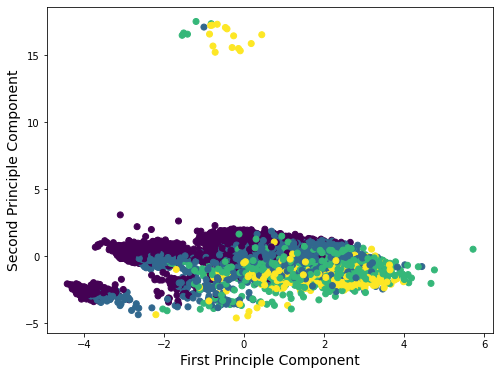

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('First Principle Component',fontsize=14)
plt.ylabel('Second Principle Component',fontsize=14)
plt.show()

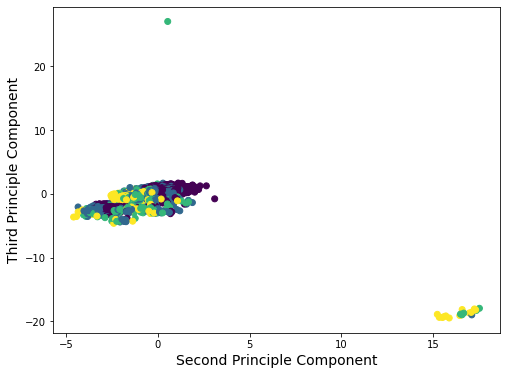

In [135]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,1],x[:,2],c=y)
plt.xlabel('Second Principle Component',fontsize=14)
plt.ylabel('Third Principle Component',fontsize=14)
plt.show()

IMBLearn Technique for balancing of Target class

In [136]:
import pandas
import numpy
print('sklearn version',sklearn.__version__)
print('numpy version',numpy.__version__)
print('pandas version',pandas.__version__)

sklearn version 1.0.2
numpy version 1.21.5
pandas version 1.4.2


In [137]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [138]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [139]:
y.value_counts()

4    4269
2    4269
3    4269
1    4269
Name: Price range, dtype: int64

We can now clearly see that the classes of target variable Price range is balanced.There are total 4 class are present and due to this we can't use Logistic Regression as well GaussianNB because these two supports only binary classes 0 & 1.

###### Training Testing Phase

taking 20% test and 80% training

In [140]:
#importing machine learning libraries for classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
kn=KNeighborsClassifier()

In [141]:
#will finding best value of random_state
for h in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=h)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    if accuracy_score(pred_train,y_train) == accuracy_score(pred_test,y_test):
        print('At random_state',h,'the model perform very well')
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
    else:
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
        print('\n')

At random_state 0
Training Accuracy Score is-  0.9141288433382138
Testing Accuracy Score is-  0.879976580796253


At random_state 1
Training Accuracy Score is-  0.9153733528550513
Testing Accuracy Score is-  0.8682669789227166


At random_state 2
Training Accuracy Score is-  0.9150805270863837
Testing Accuracy Score is-  0.8776346604215457


At random_state 3
Training Accuracy Score is-  0.9166178623718887
Testing Accuracy Score is-  0.8594847775175644


At random_state 4
Training Accuracy Score is-  0.9133967789165447
Testing Accuracy Score is-  0.8688524590163934


At random_state 5
Training Accuracy Score is-  0.91398243045388
Testing Accuracy Score is-  0.8662177985948478


At random_state 6
Training Accuracy Score is-  0.91303074670571
Testing Accuracy Score is-  0.8688524590163934


At random_state 7
Training Accuracy Score is-  0.9176427525622255
Testing Accuracy Score is-  0.8509953161592506


At random_state 8
Training Accuracy Score is-  0.916398243045388
Testing Accuracy Sco

In [142]:
#Traing the Logistic Regression Model at Random_State 15
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)
kn.fit(x_train,y_train)
pred_train=kn.predict(x_train)
pred_test=kn.predict(x_test)
print('At random_state',15)
print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
print('\n')

At random_state 15
Training Accuracy Score is-  0.9159590043923865
Testing Accuracy Score is-  0.8574355971896955




###### CV Score

In [143]:
for i in range(2,5):
    cvs=cross_val_score(kn,x,y,cv=i)
    print(f'At K-Fold {i} the CV Score of model is {cvs.mean()}')

At K-Fold 2 the CV Score of model is 0.8126024830171
At K-Fold 3 the CV Score of model is 0.8335090185055049
At K-Fold 4 the CV Score of model is 0.8430545795268213


###### we are getting good CV score as 85%,so we can say that CV score is helping the model in generalizing and make it perform better while doing the prediction.

In [164]:
#importing other libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
dtc=DecisionTreeClassifier()
svc=SVC()
mnb=MultinomialNB()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
sgd=SGDClassifier()

In [165]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print('For',algorithm)
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    for l in range(2,5):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

In [146]:
model(dtc,x,y)

For DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.8343091334894613
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.7966151323494963


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.8191613961115015


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.8182829702506442




In [147]:
model(svc,x,y)

For SVC()
Training_Accuracy_Score= 0.7108345534407028
Testing_Accuracy_Score= 0.7122365339578455
At the K-Fold 2 the CV score of model SVC() is 0.6713516045912391


At the K-Fold 3 the CV score of model SVC() is 0.6808386038884985


At the K-Fold 4 the CV score of model SVC() is 0.6847622394003279




In [177]:
model(rfc,x,y)

For RandomForestClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.8875878220140515
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.8496720543452799


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.8664792691496838


At the K-Fold 4 the CV score of model RandomForestClassifier() is 0.8742094167252283




In [148]:
model(ad,x,y)

For AdaBoostClassifier()
Training_Accuracy_Score= 0.5848462664714494
Testing_Accuracy_Score= 0.5875292740046838
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.5800538767861326


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.5882525181541345


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.5897165612555633




In [149]:
model(sgd,x,y)

For SGDClassifier()
Training_Accuracy_Score= 0.5271595900439239
Testing_Accuracy_Score= 0.5339578454332553
At the K-Fold 2 the CV score of model SGDClassifier() is 0.5177442023893184


At the K-Fold 3 the CV score of model SGDClassifier() is 0.5326774420238932


At the K-Fold 4 the CV score of model SGDClassifier() is 0.5325017568517217




In [150]:
model(grd,x,y)

For GradientBoostingClassifier()
Training_Accuracy_Score= 0.7937042459736456
Testing_Accuracy_Score= 0.7535128805620609
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.7371749824314828


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.7351838838135395


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.7402201920824549




###### Hyper Parameter Tuning
To make the model more accurate by providing their best parameters

In [151]:
#defining all the parameters of the respective models
dict_svc={'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
dict_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
dict_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None]}
dict_ad={'algorithm':['SAMME', 'SAMME.R']}
dict_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse']}

In [152]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [154]:
HPT(dtc,dict_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}


In [178]:
HPT(rfc,dict_rfc)

The best Parameters of the model RandomForestClassifier() is {'criterion': 'gini', 'max_features': 'sqrt'}


In [156]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME.R'}


In [158]:
#Redefining the models after getting the parameters
svc=SVC(decision_function_shape='ovo',gamma='auto')
dtc=DecisionTreeClassifier(criterion='log_loss',max_features='sqrt',splitter='best')
rfc=RandomForestClassifier(criterion='entropy',max_features='sqrt')
ad=AdaBoostClassifier(algorithm= 'SAMME.R')
grd=GradientBoostingClassifier(loss='deviance',criterion='friedman_mse')

In [159]:
model(kn,x,y)

For KNeighborsClassifier()
Training_Accuracy_Score= 0.9159590043923865
Testing_Accuracy_Score= 0.8574355971896955
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.8126024830171


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.8335090185055049


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.8430545795268213




In [160]:
model(svc,x,y)

For SVC(decision_function_shape='ovo', gamma='auto')
Training_Accuracy_Score= 0.7637628111273792
Testing_Accuracy_Score= 0.7494145199063232
At the K-Fold 2 the CV score of model SVC(decision_function_shape='ovo', gamma='auto') is 0.7215975638322791


At the K-Fold 3 the CV score of model SVC(decision_function_shape='ovo', gamma='auto') is 0.7280393534785663


At the K-Fold 4 the CV score of model SVC(decision_function_shape='ovo', gamma='auto') is 0.7326657296790817




In [166]:
model(dtc,x,y)

For DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.8316744730679156
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.7989576013117826


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.8211524947294447


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.819688451628016




In [167]:
model(ad,x,y)

For AdaBoostClassifier()
Training_Accuracy_Score= 0.5848462664714494
Testing_Accuracy_Score= 0.5875292740046838
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.5800538767861326


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.5882525181541345


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.5897165612555633




In [168]:
model(rfc,x,y)

For RandomForestClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.8931498829039812
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.8499648629655656


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.8700515343171703


At the K-Fold 4 the CV score of model RandomForestClassifier() is 0.872921058795971




###### Saving the Best Model

In [169]:
import joblib

In [170]:
file='zomato_price_range.obj'
joblib.dump(rfc,file)

['zomato_price_range.obj']

###### Loading the Model

In [171]:
c=joblib.load('zomato_price_range.obj')
c

RandomForestClassifier()

In [172]:
Prediction=c.predict(x_test)
Prediction

array([3, 4, 2, ..., 3, 1, 3], dtype=int64)

In [173]:
accuracyScore=accuracy_score(y_test,Prediction)
accuracyScore

0.8931498829039812

###### Conclusion

In [174]:
conclusion_classification=pd.DataFrame(data=[Prediction,y_test],index=['Predicted Price range','Original Price range'])
conclusion_classification

,0,1,2,3,4,5,6,7,8,9,...,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415
Predicted Price range,3,4,2,3,3,2,2,1,1,1,...,1,4,3,3,2,2,4,3,1,3
Original Price range,1,1,2,3,3,2,1,1,1,1,...,1,4,3,3,2,2,4,3,1,3


Actual value and predicted value is almost same with the help of this model too but since the testing accuracy score of the model is higher as compare to other hence will say that RandomForestClassifier model performs really well while deploying our model on testing and we've got 90% of accuracy while doing so.

###### Thank you